# importing libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Datasets mentioned below are given to us.¶

'application_data.csv'
contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [2]:
#reading the 'application_data.csv' as application

In [3]:
application = pd.read_csv('application_data.csv')

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#shape of the dataframe
application.shape

(307511, 122)

In [6]:
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#calculating the percentage of missing values in dataframe, in a sorted format

round((application.isnull().mean() * 100), 2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [8]:
#Since the columns are more than 100, dropping the columns which has more than 30% of null values, as they do not provide sufficeant data to analyse

cutoff =30

drop_cols = application.columns[round((application.isnull().mean() * 100), 2)>cutoff].tolist()

In [9]:
#droppong the columns 
application.drop(drop_cols,axis=1,inplace =True)

In [10]:
#shape of the DF after dropping the columns with missing values
application.shape

(307511, 72)

In [11]:
(application.isnull().mean()*100).sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4 

# extracing the columns with missing values less than 1%

In [12]:
null_info = application.isnull().mean()*100

In [13]:
null_col = null_info[(null_info>0.0) & (null_info<=1)]

In [14]:
null_cols_del = null_col.index.tolist()
null_cols_del

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

# Deleting the rows in which the missing values of above columns is present

In [15]:
application.dropna(subset=null_cols_del,inplace=True)

# imputing the values to the remaining columns

In [16]:
#imputing median of EXT_SOURCE_3 to missing values as it is a continuous data
application.EXT_SOURCE_3.fillna(application.EXT_SOURCE_3.median(),inplace=True)

In [17]:
null_info = application.isnull().mean()*100
null_col = null_info[null_info>0]
null_col

AMT_REQ_CREDIT_BUREAU_HOUR    13.49879
AMT_REQ_CREDIT_BUREAU_DAY     13.49879
AMT_REQ_CREDIT_BUREAU_WEEK    13.49879
AMT_REQ_CREDIT_BUREAU_MON     13.49879
AMT_REQ_CREDIT_BUREAU_QRT     13.49879
AMT_REQ_CREDIT_BUREAU_YEAR    13.49879
dtype: float64

In [18]:
null_col_fill = null_col.index.tolist()
null_col_fill

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [19]:
for col in null_col_fill:
    mode  = application[col].mode()[0]
    application[col].fillna(mode,inplace=True)
  

In [20]:
(application.isnull().mean()*100).sort_values(ascending=False)

SK_ID_CURR                     0.0
TARGET                         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

# Correcting negative values to absolute values 

In [21]:
#converting the columns related to number of days to positive
convert =[]

for col in application.columns.tolist():
    if ((application[col].dtype=='int64') or (application[col].dtype=='float64')) and (application[col].min()<0):
    #gathering all the columns whose data type in int or float and values in negative
        convert.append(col)
convert

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [22]:
for col in convert:
    application[col] = application[col].abs()
application[convert].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [23]:
#for the ease of understanding converting the days into years in above coumns
#Diving the value by 365 and rounding it off to 0.
#created respective columns in years

application['AGE_YEARS'] = round(application.DAYS_BIRTH/365,0)
application['EMPLOYMENT_YEARS']= round(application.DAYS_EMPLOYED/365,0)
application['REGISTRATION_YEARS'] = round(application.DAYS_REGISTRATION/365,0)
application['YEARS_ID_PUBLISH'] = round(application.DAYS_ID_PUBLISH/365,0)
application['LAST_PHONE_CHANGE_YEARS'] = round(application.DAYS_LAST_PHONE_CHANGE/365,0)

In [24]:
#filtering the column names with days in them
DAYS_COLUMNS = list(filter(lambda X: 'DAYS' in X  , application))
DAYS_COLUMNS

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [25]:
#dropping the days_columns as we have created a nw columns for them in terms of years

application.drop(DAYS_COLUMNS,axis =1,inplace=True)

# finding the hidden missing values such as xna and taking action

In [26]:
application.CODE_GENDER.value_counts()                  

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
application.loc[application.CODE_GENDER == 'XNA','CODE_GENDER'] = application.CODE_GENDER.mode()
application.CODE_GENDER.value_counts()

F    200482
M    104045
Name: CODE_GENDER, dtype: int64

In [28]:
application.loc[application.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = application.ORGANIZATION_TYPE.mode()
application.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67270
Self-employed             38048
Other                     16546
Medicine                  11078
Business Entity Type 2    10458
Government                10308
School                     8823
Trade: type 7              7769
Kindergarten               6823
Construction               6659
Business Entity Type 1     5919
Transport: type 4          5353
Trade: type 3              3443
Industry: type 9           3328
Industry: type 3           3254
Security                   3215
Housing                    2935
Industry: type 11          2685
Military                   2610
Bank                       2455
Agriculture                2436
Police                     2319
Transport: type 2          2184
Postal                     2137
Security Ministries        1953
Trade: type 2              1871
Restaurant                 1794
Services                   1561
University                 1311
Industry: type 7           1295
Transport: type 3          1174
Industry

In [29]:
#creating a categorical version of the columns which are in continuous nomial column
application['AMT_INCOME_CAT'] = pd.qcut(application.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
application['AMT_INCOME_CAT'].head()

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_INCOME_CAT, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [30]:
#creating age rnage for the ease of understanding 

application['AGE_RANGE'] = pd.cut(application['AGE_YEARS'], [10, 20, 30, 40, 50, 60, 70],labels=['10-20','20-30', '30-40', '40-50', '50-60', '60-70'])

In [31]:
application['AMT_CREDIT_CAT'] = pd.qcut(application.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
application['AMT_CREDIT_CAT'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_CAT, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [32]:
#segmenting the flag type columns based on column description

cat_col_flag = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','FLAG_OWN_CAR',
                'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
                'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

len(cat_col_flag)

30

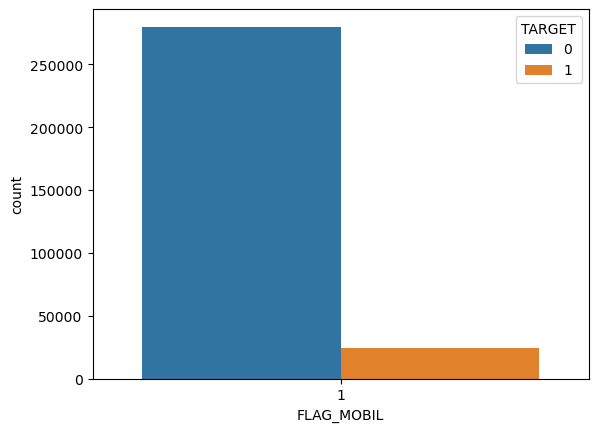

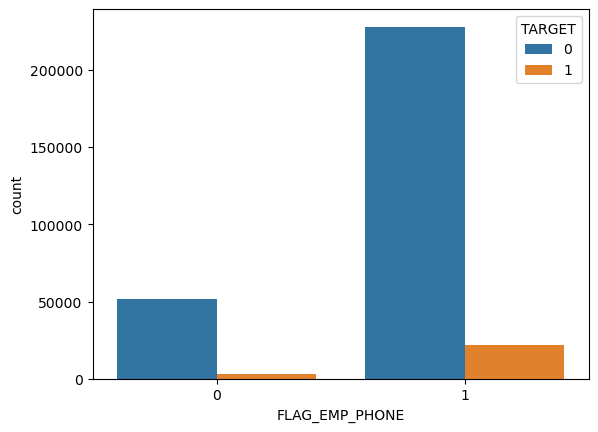

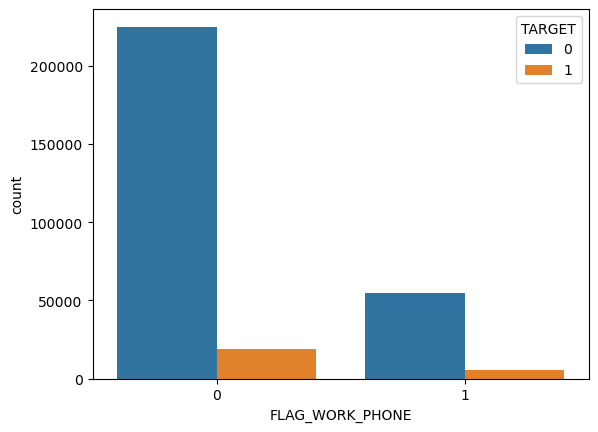

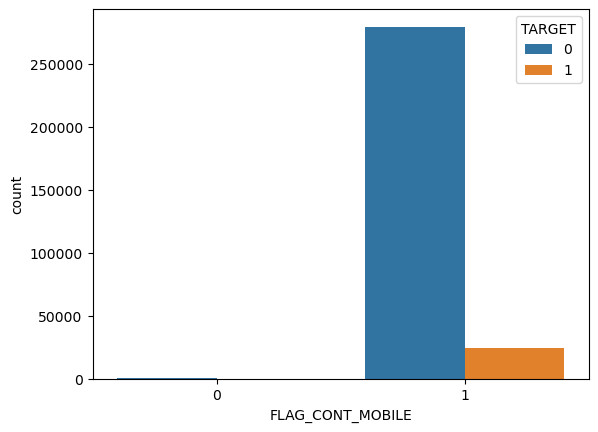

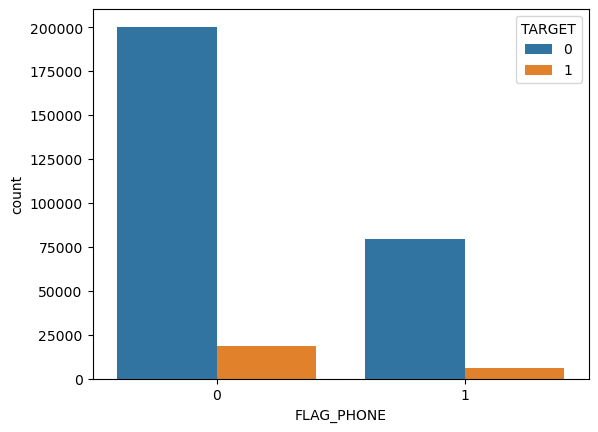

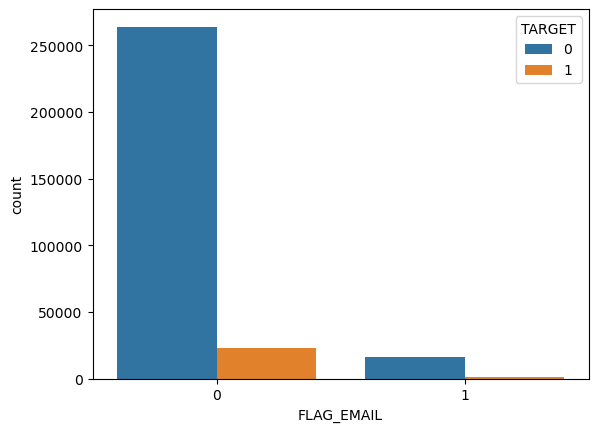

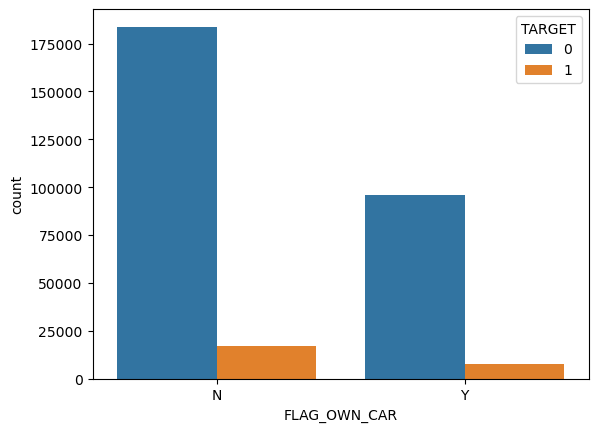

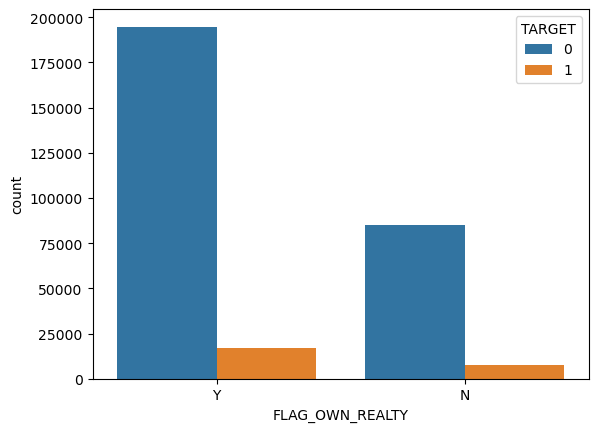

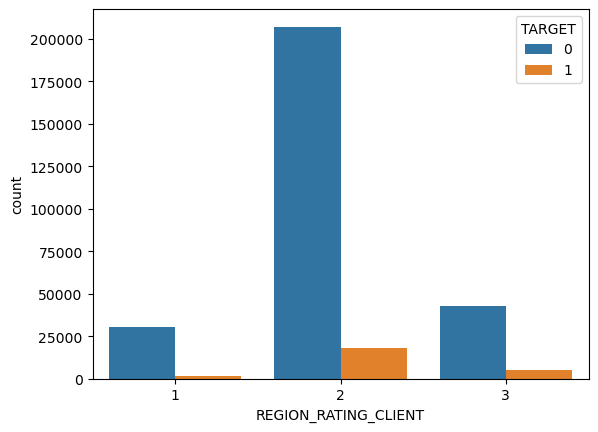

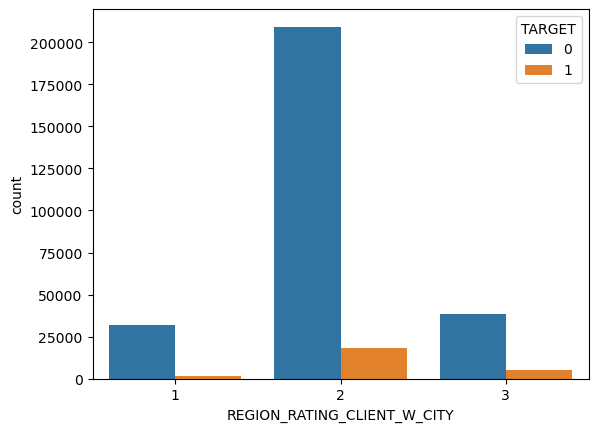

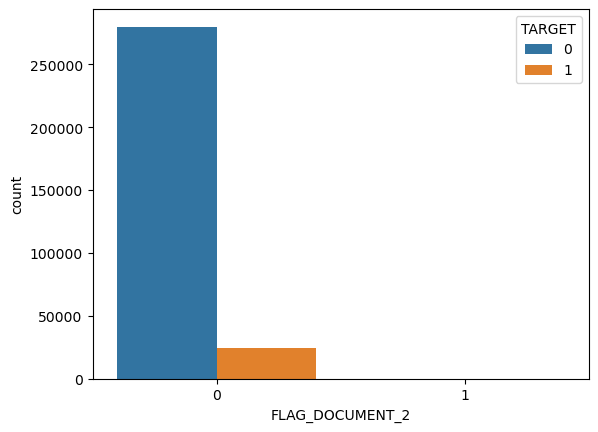

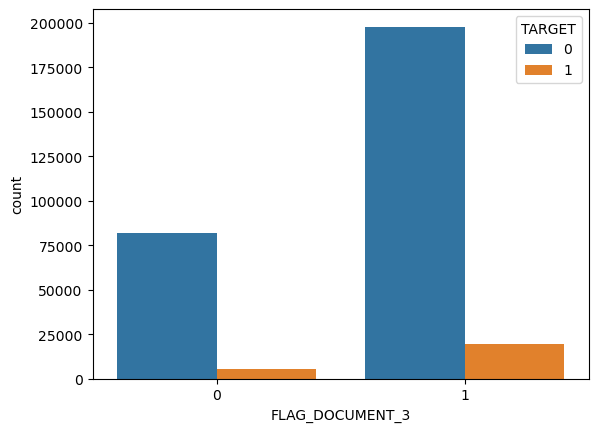

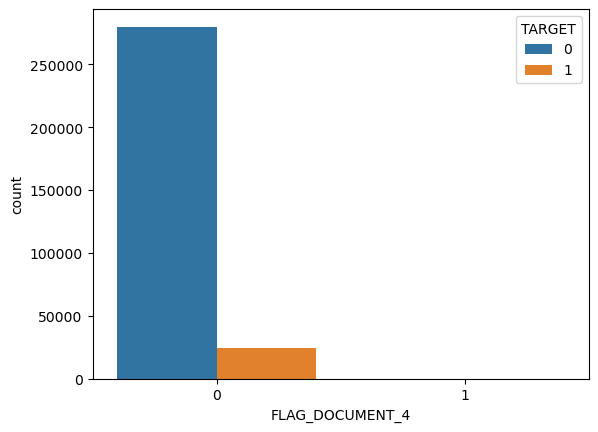

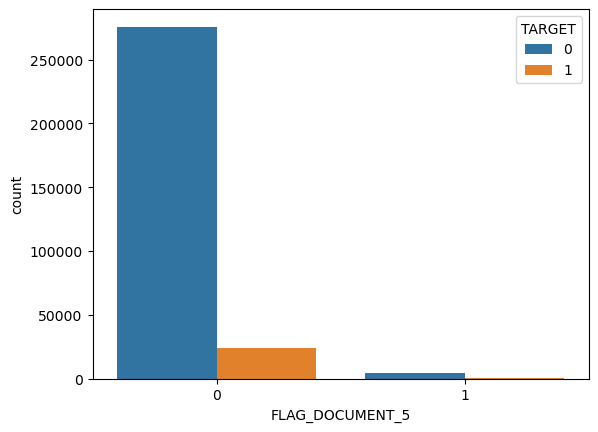

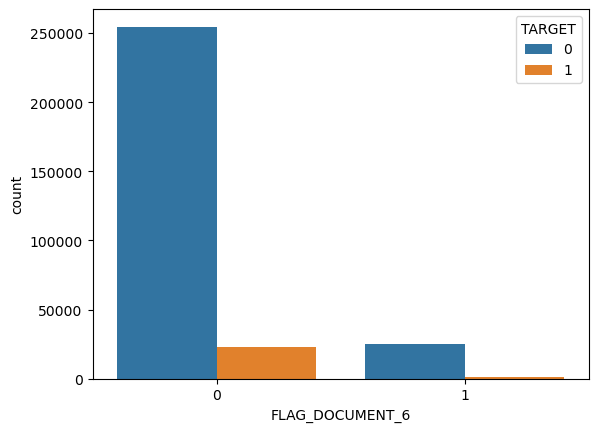

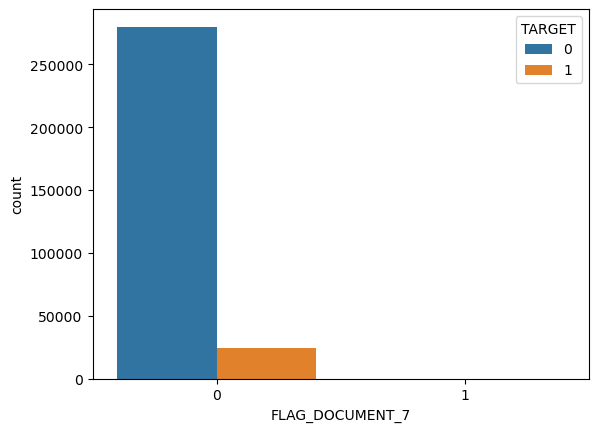

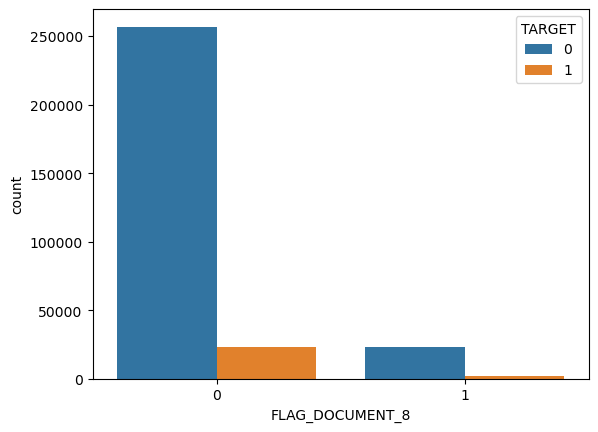

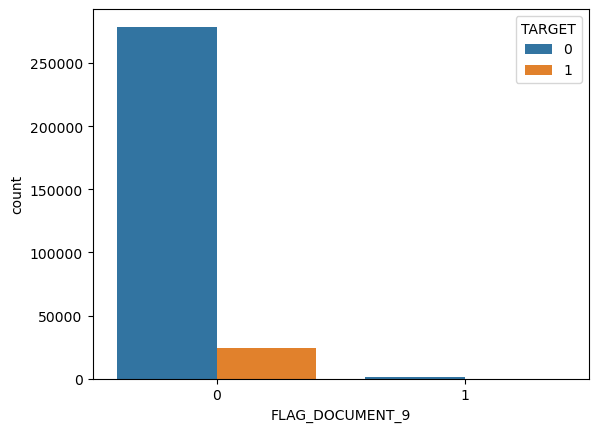

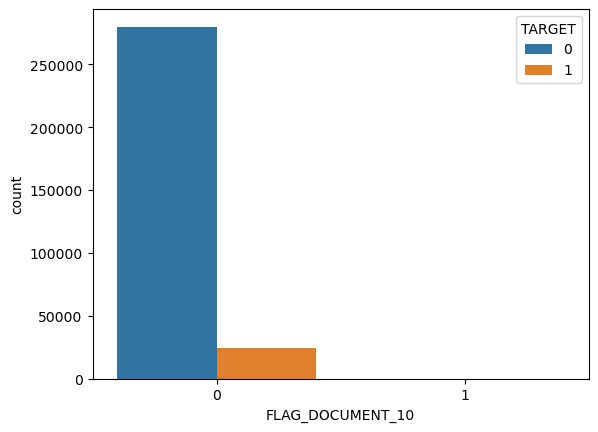

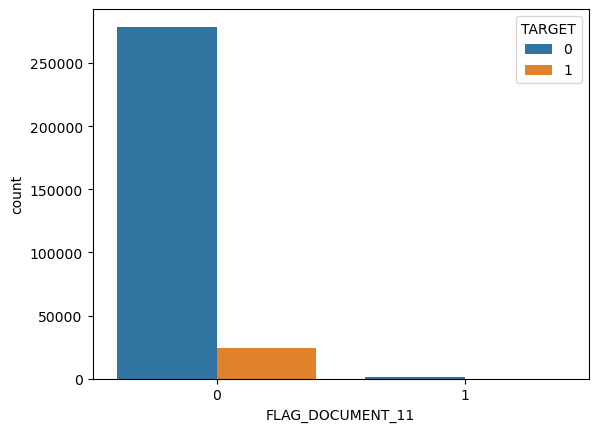

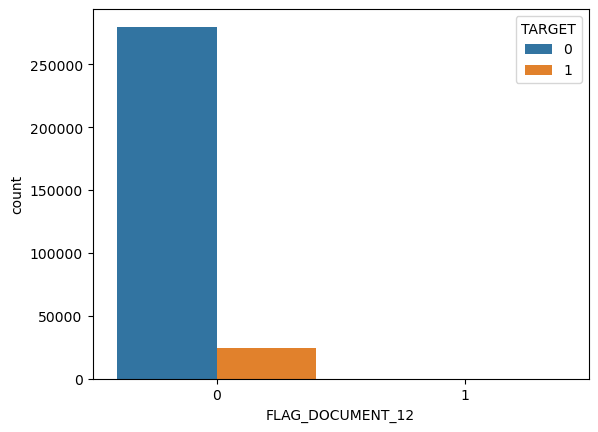

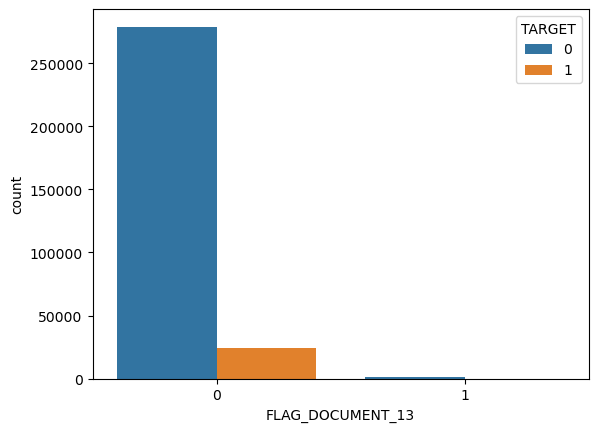

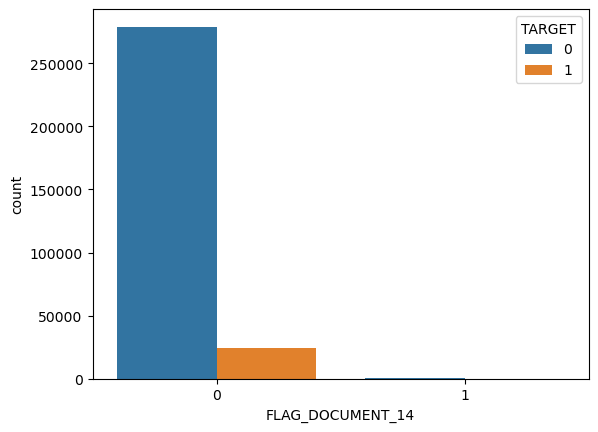

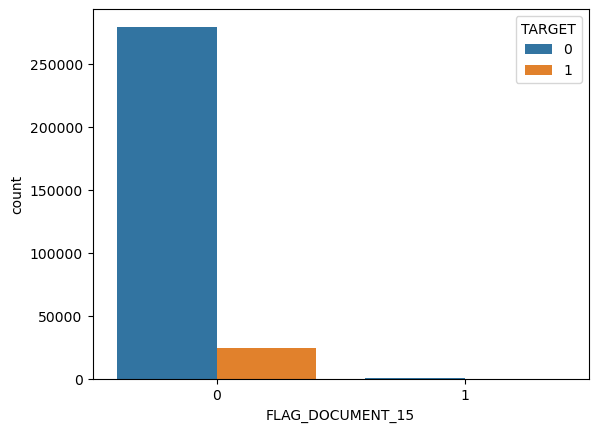

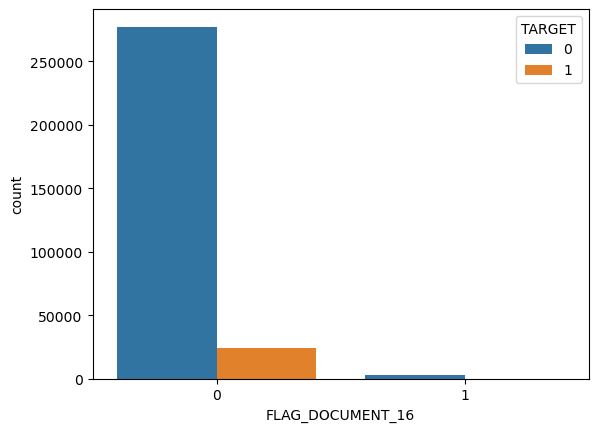

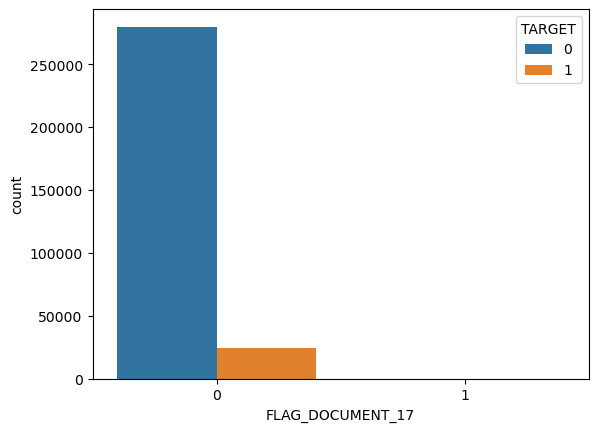

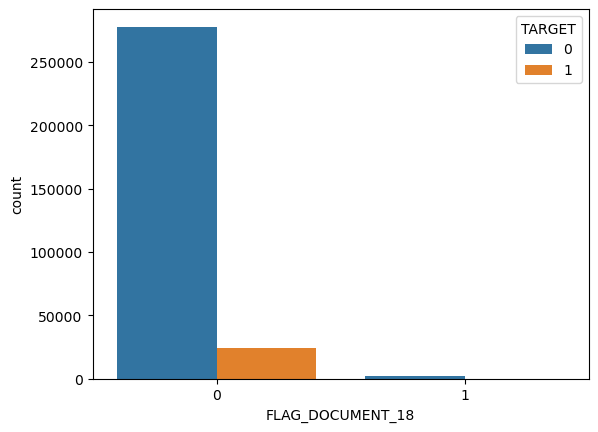

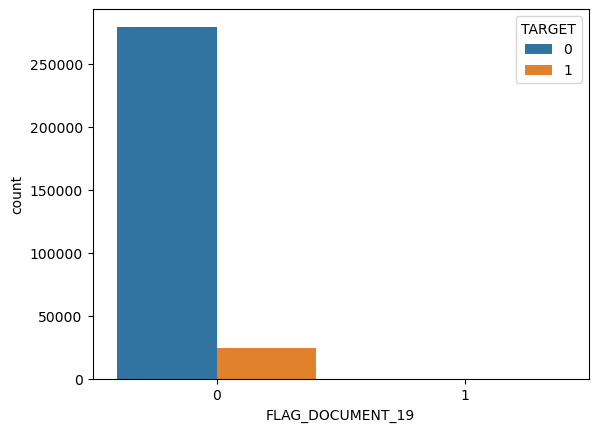

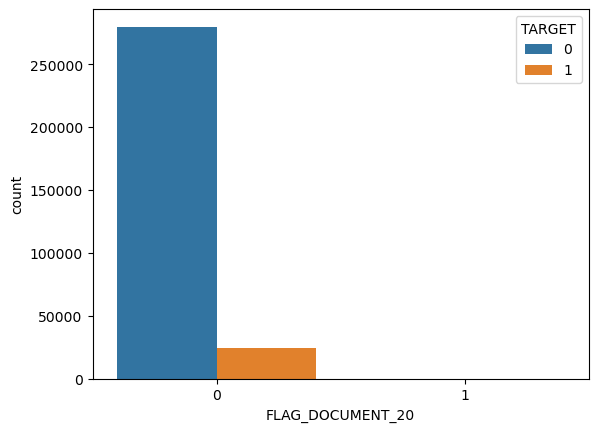

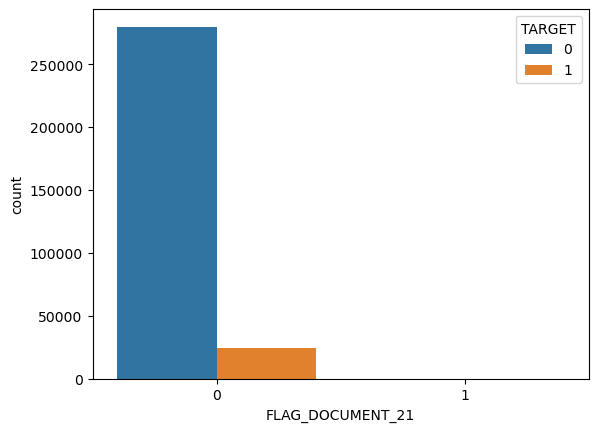

In [33]:
for col in  cat_col_flag:
    sns.countplot(data = application, x = col, hue = 'TARGET');
    plt.show()

In [34]:
# After checking the graph we conclude that the following columns do not provide any valuable strong insights on the target variable
col_to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']

application.drop(col_to_drop,axis=1,inplace=True)


In [35]:
len(col_to_drop)

26

In [36]:
application.shape

(304531, 49)

In [37]:
#updating flag columns
cat_col_flag_new = list(set(cat_col_flag) - set(col_to_drop))
cat_col_flag_new

['REGION_RATING_CLIENT',
 'FLAG_OWN_REALTY',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_OWN_CAR']

# Outlier Detection

In [38]:
#columns that have Social
SOCIAL_COLUMNS = list(filter(lambda x: 'SOCIAL' in x  , application))
SOCIAL_COLUMNS

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

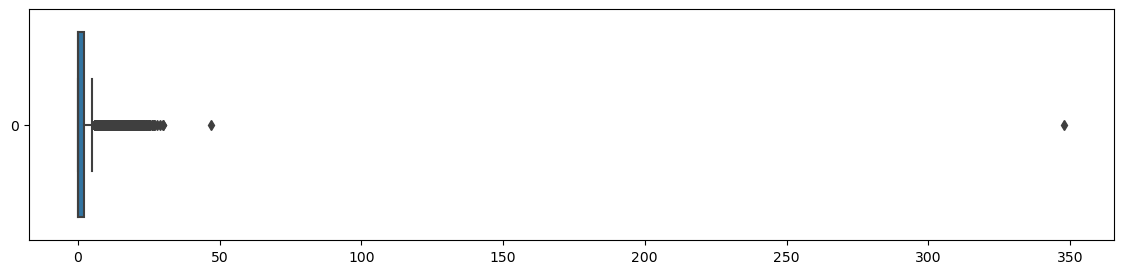

count    304531.000000
mean          1.422052
std           2.401424
min           0.000000
50%           0.000000
80%           3.000000
90%           4.000000
99%          10.000000
99.9%        17.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


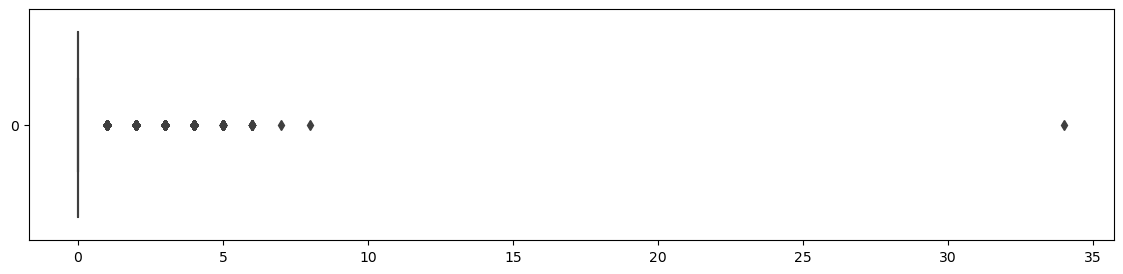

count    304531.000000
mean          0.143421
std           0.446721
min           0.000000
50%           0.000000
80%           0.000000
90%           1.000000
99%           2.000000
99.9%         4.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


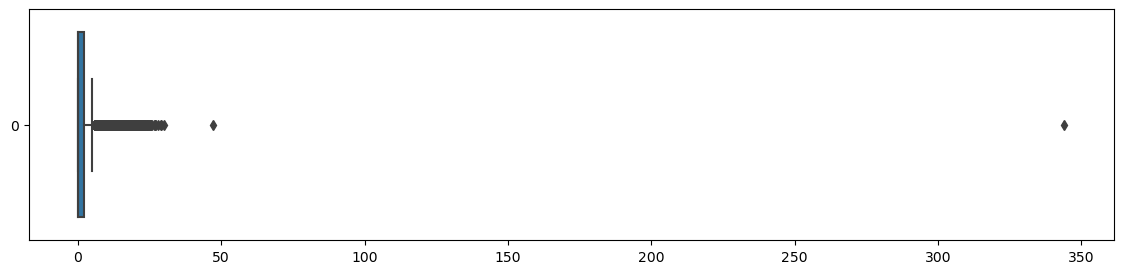

count    304531.000000
mean          1.405131
std           2.380308
min           0.000000
50%           0.000000
80%           3.000000
90%           4.000000
99%          10.000000
99.9%        16.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


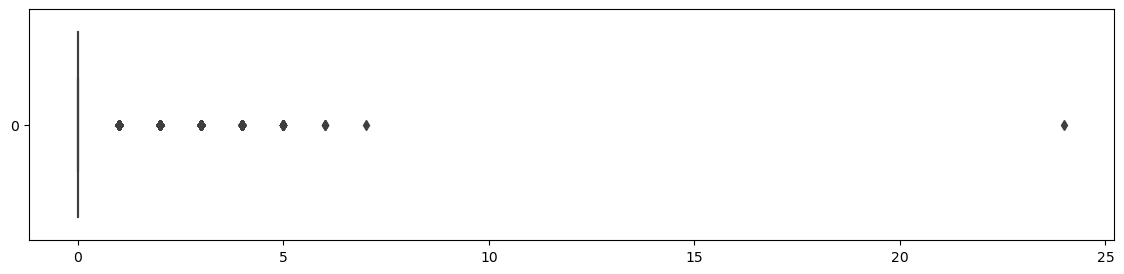

count    304531.000000
mean          0.100069
std           0.362388
min           0.000000
50%           0.000000
80%           0.000000
90%           0.000000
99%           2.000000
99.9%         3.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [39]:
for i in SOCIAL_COLUMNS:
    plt.figure(figsize=(14,3))
    sns.boxplot(application[i],orient='h')
    plt.show()
    print(application[i].describe(percentiles = [0.999,0.99,0.9,0.8]))

# Observations from the above BOXPLOT 
1) All of the above columns have an outlier which are atleast 5 times more than the 99.9 percentile of the data, which can be considered as outliers

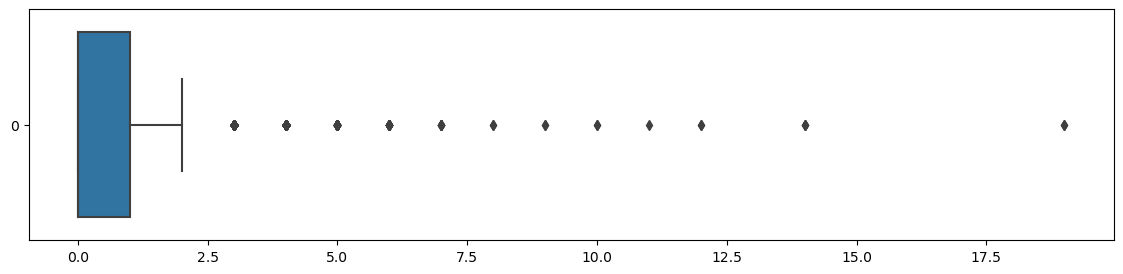

describe 
 count    304531.000000
mean          0.417140
std           0.722308
min           0.000000
50%           0.000000
80%           1.000000
90%           2.000000
99%           3.000000
99.9%         4.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


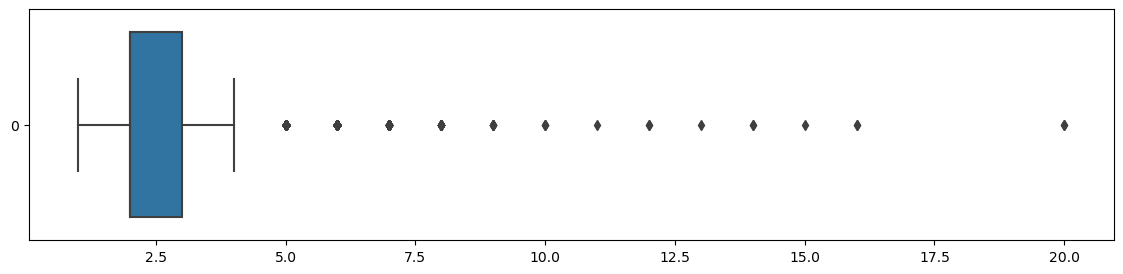

describe 
 count    304531.000000
mean          2.153163
std           0.910638
min           1.000000
50%           2.000000
80%           3.000000
90%           3.000000
99%           5.000000
99.9%         6.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [40]:
#Analysing the family members and children count columns

Count_Coll=['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

for i in Count_Coll:
    plt.figure(figsize=(14,3))
    sns.boxplot(application[i],orient='h')
    plt.show()
    print('describe \n',application[i].describe(percentiles = [0.999,0.99,0.9,0.8]))


# Insights
1) CNT_CHILDREN has 4 at 99.9 percentile hence, we can consider the children count above or equal to 5 as outliers

2) CNT_FAM_MEMBERS has 6 at 99.9 percentile,since we already have children count outlier as 5 we can consider the anything above 9 as outliers



In [41]:
#finding the outliers for the remaining numerical columns 

numerical_cols = application.select_dtypes(include='number').columns.tolist()

#removing the columns -SK_ID_CURR and TARGET from the list 
numerical_cols.remove('SK_ID_CURR')
numerical_cols.remove('TARGET')





In [42]:
#removing days and fam count columns
for col in SOCIAL_COLUMNS:
    numerical_cols.remove(col)

In [43]:
#removing the childer and family count columns
for col in Count_Coll:
    numerical_cols.remove(col)

In [44]:
#removing the categorical columns 
numerical_cols.remove('REG_REGION_NOT_LIVE_REGION')
numerical_cols.remove('REG_REGION_NOT_WORK_REGION')
numerical_cols.remove('LIVE_REGION_NOT_WORK_REGION')
numerical_cols.remove('REG_CITY_NOT_LIVE_CITY')
numerical_cols.remove('REG_CITY_NOT_WORK_CITY')
numerical_cols.remove('LIVE_CITY_NOT_WORK_CITY')


In [45]:
print(len(numerical_cols))
numerical_cols



21


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_YEARS',
 'EMPLOYMENT_YEARS',
 'REGISTRATION_YEARS',
 'YEARS_ID_PUBLISH',
 'LAST_PHONE_CHANGE_YEARS']

# Analysing the year related columns

In [46]:
year_col = list(filter(lambda x: 'YEARS' in x, application))
year_col

['AGE_YEARS',
 'EMPLOYMENT_YEARS',
 'REGISTRATION_YEARS',
 'YEARS_ID_PUBLISH',
 'LAST_PHONE_CHANGE_YEARS']

In [47]:
#removing years columns form numercial columns

for col in year_col:
    numerical_cols.remove(col)


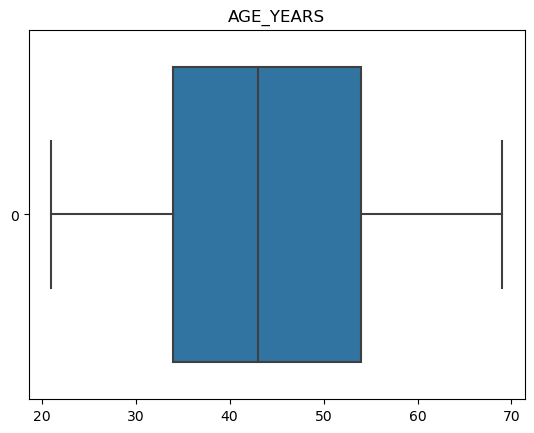

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean         43.948357
std          11.958438
min          21.000000
50%          43.000000
80%          56.000000
90%          61.000000
99%          67.000000
99.9%        68.470000
max          69.000000
Name: AGE_YEARS, dtype: float64


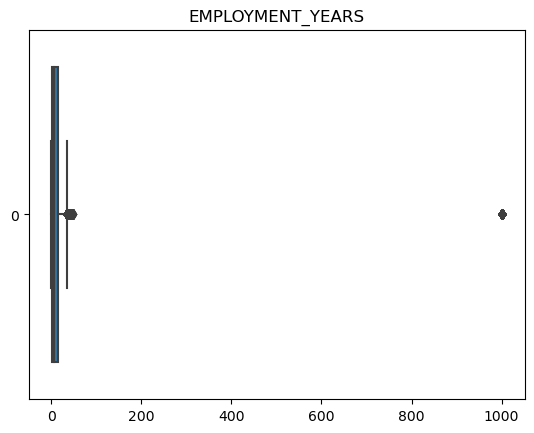

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean        185.659637
std         382.203829
min           0.000000
50%           6.000000
80%          25.000000
90%        1001.000000
99%        1001.000000
99.9%      1001.000000
max        1001.000000
Name: EMPLOYMENT_YEARS, dtype: float64


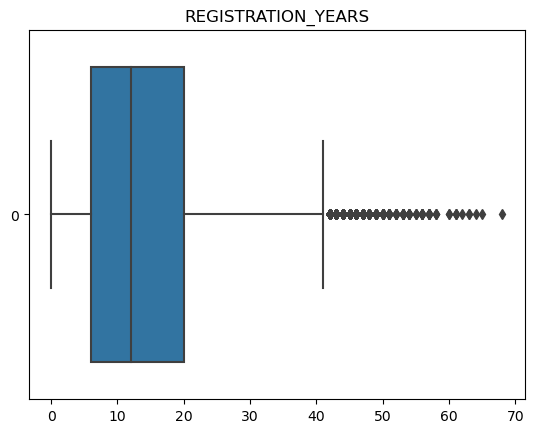

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean         13.660997
std           9.655846
min           0.000000
50%          12.000000
80%          23.000000
90%          27.000000
99%          38.000000
99.9%        45.000000
max          68.000000
Name: REGISTRATION_YEARS, dtype: float64


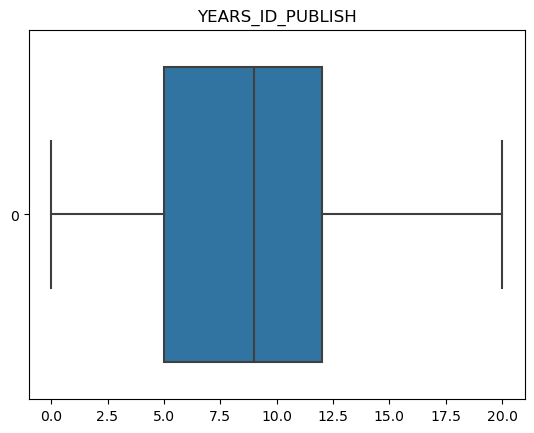

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          8.199980
std           4.151239
min           0.000000
50%           9.000000
80%          12.000000
90%          13.000000
99%          15.000000
99.9%        17.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


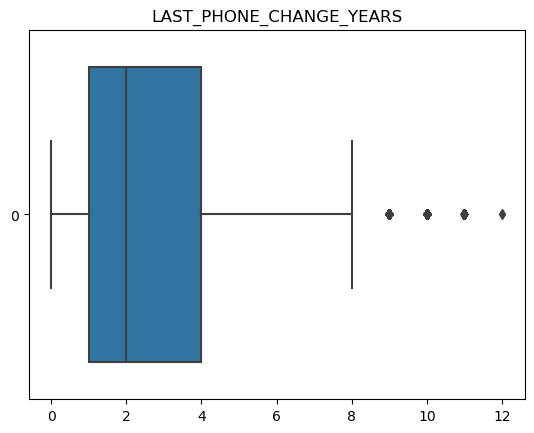

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          2.639577
std           2.281724
min           0.000000
50%           2.000000
80%           5.000000
90%           6.000000
99%           9.000000
99.9%        10.000000
max          12.000000
Name: LAST_PHONE_CHANGE_YEARS, dtype: float64


In [48]:
#plotting the boxplot 
for col in year_col:
    sns.boxplot(application[col],orient='h');
    plt.title(col)
    plt.figure(figsize=(4,3))
    plt.show()
    print('describe\n',application[col].describe(percentiles = [0.999,0.99,0.9,0.8]))

# insights

1) EMPLOYMENT_YEARS has an value of 1000 years which is not possible, clearly there is an error while entering the value

2) AGE_YEARS and YEARS_ID_PUBLISH have no outliers

3) REGISTRATION_YEARS and LAST_PHONE_CHANGE_YEARS have some outliers 


# Analysing the remaining numerical columns 

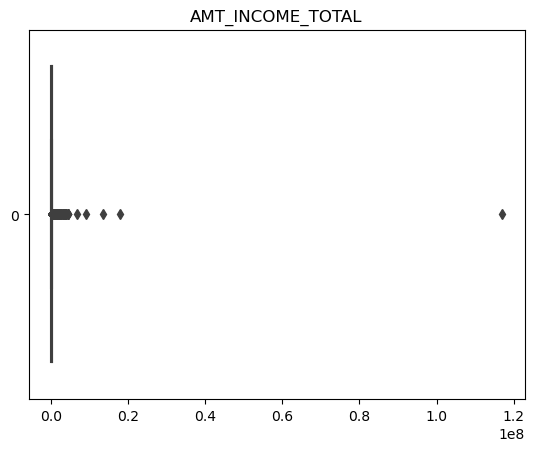

<Figure size 400x300 with 0 Axes>

describe
 count    3.045310e+05
mean     1.686634e+05
std      2.378910e+05
min      2.565000e+04
50%      1.476000e+05
80%      2.250000e+05
90%      2.700000e+05
99%      4.545000e+05
99.9%    9.000000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


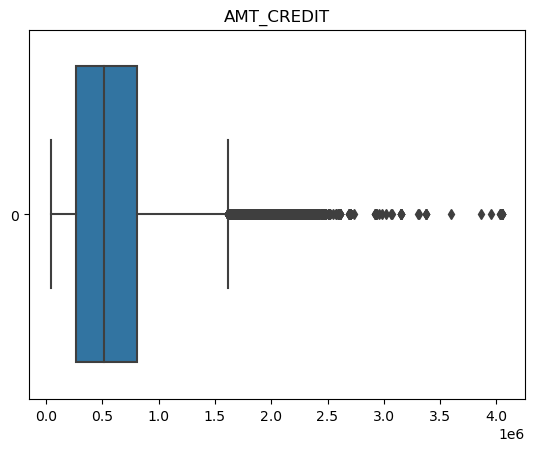

<Figure size 400x300 with 0 Axes>

describe
 count    3.045310e+05
mean     5.995592e+05
std      4.021453e+05
min      4.500000e+04
50%      5.172660e+05
80%      9.000000e+05
90%      1.133748e+06
99%      1.845000e+06
99.9%    2.517300e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


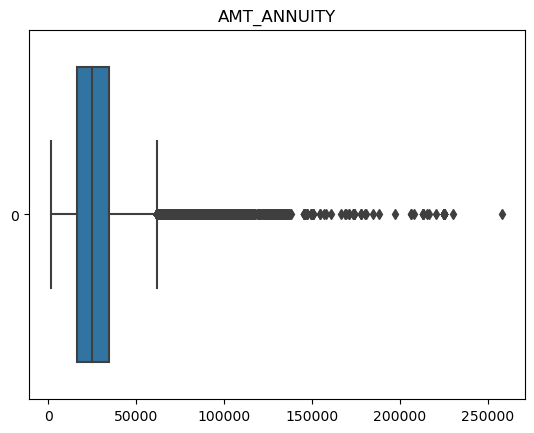

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean      27146.369655
std       14480.104699
min        1615.500000
50%       24939.000000
80%       37575.000000
90%       45954.000000
99%       70015.500000
99.9%    110047.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


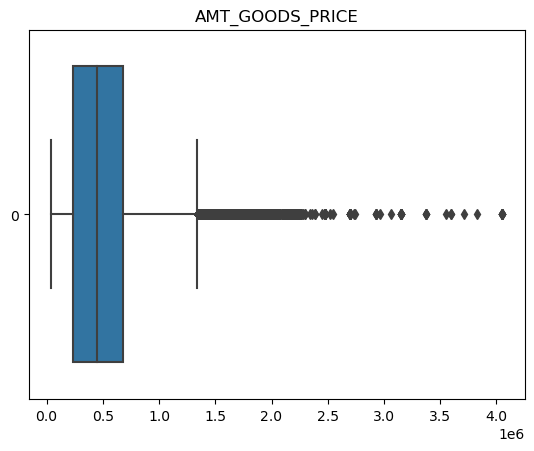

<Figure size 400x300 with 0 Axes>

describe
 count    3.045310e+05
mean     5.384949e+05
std      3.690524e+05
min      4.050000e+04
50%      4.500000e+05
80%      8.190000e+05
90%      1.093500e+06
99%      1.800000e+06
99.9%    2.250000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


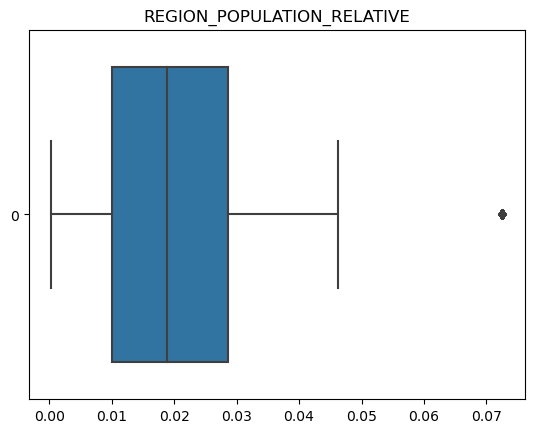

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.020842
std           0.013808
min           0.000290
50%           0.018850
80%           0.030755
90%           0.035792
99%           0.072508
99.9%         0.072508
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


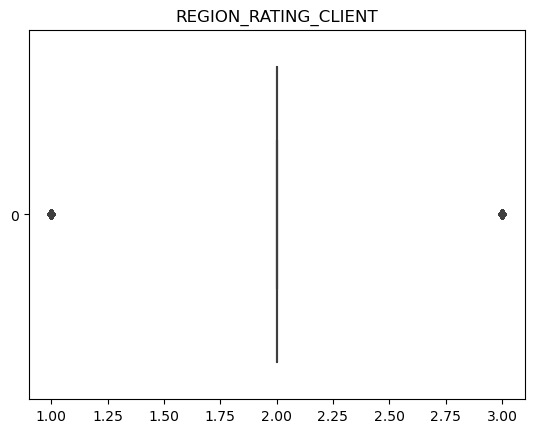

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          2.053328
std           0.508890
min           1.000000
50%           2.000000
80%           2.000000
90%           3.000000
99%           3.000000
99.9%         3.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


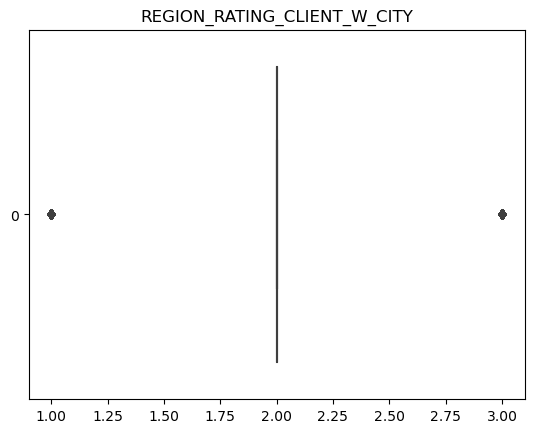

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          2.032302
std           0.502616
min           1.000000
50%           2.000000
80%           2.000000
90%           3.000000
99%           3.000000
99.9%         3.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


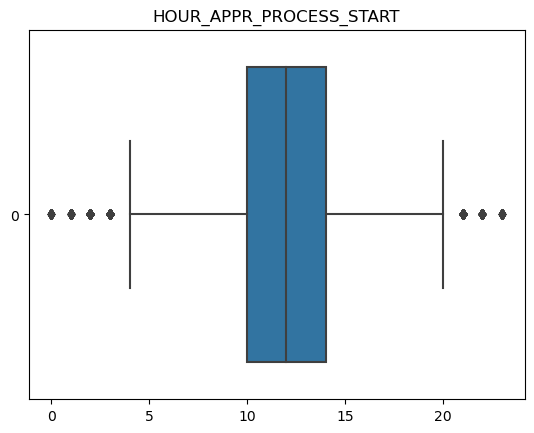

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean         12.060079
std           3.265884
min           0.000000
50%          12.000000
80%          15.000000
90%          16.000000
99%          19.000000
99.9%        21.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


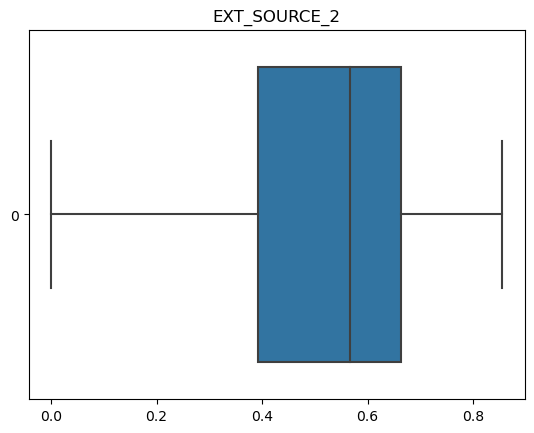

<Figure size 400x300 with 0 Axes>

describe
 count    3.045310e+05
mean     5.142203e-01
std      1.911246e-01
min      8.173617e-08
50%      5.658110e-01
80%      6.820024e-01
90%      7.219853e-01
99%      7.827980e-01
99.9%    8.039064e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


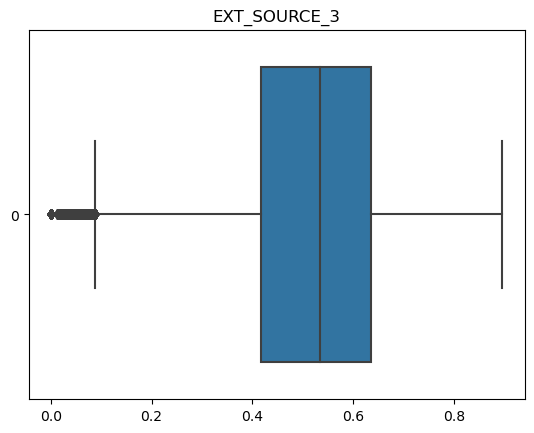

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.515614
std           0.174780
min           0.000527
50%           0.535276
80%           0.669057
90%           0.735221
99%           0.832785
99.9%         0.863363
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


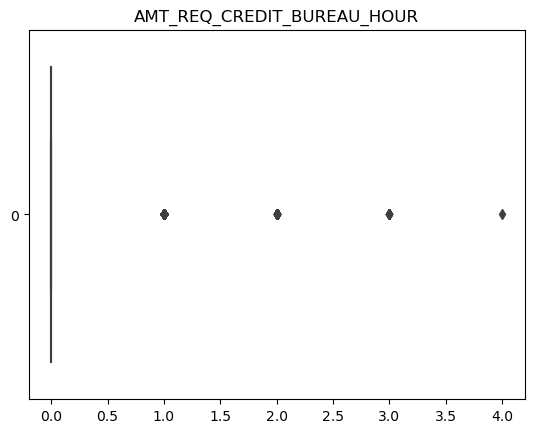

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.005523
std           0.077957
min           0.000000
50%           0.000000
80%           0.000000
90%           0.000000
99%           0.000000
99.9%         1.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


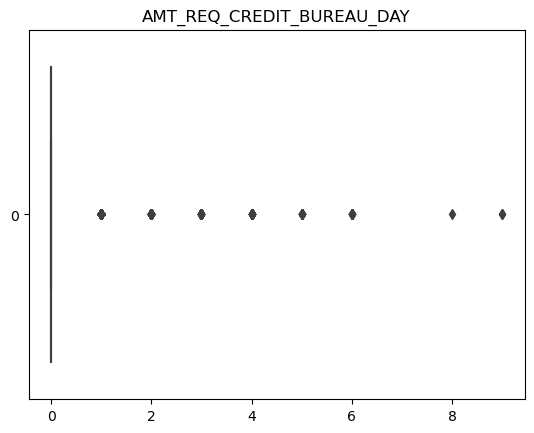

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.006039
std           0.102667
min           0.000000
50%           0.000000
80%           0.000000
90%           0.000000
99%           0.000000
99.9%         1.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


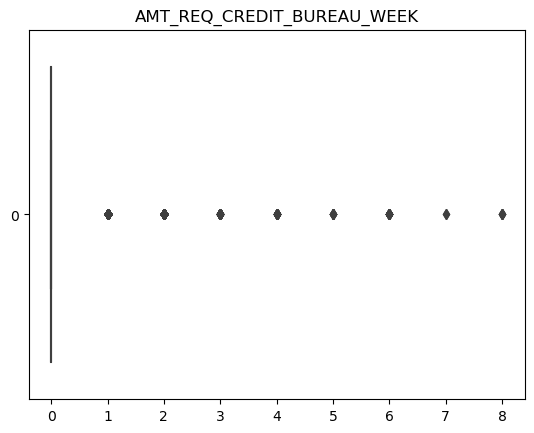

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.029829
std           0.190669
min           0.000000
50%           0.000000
80%           0.000000
90%           0.000000
99%           1.000000
99.9%         2.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


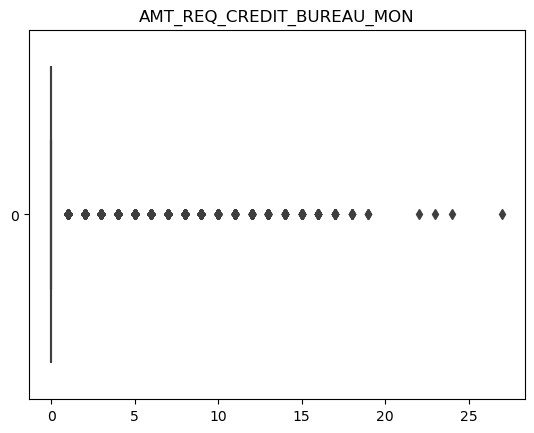

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.231635
std           0.856216
min           0.000000
50%           0.000000
80%           0.000000
90%           1.000000
99%           4.000000
99.9%        11.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


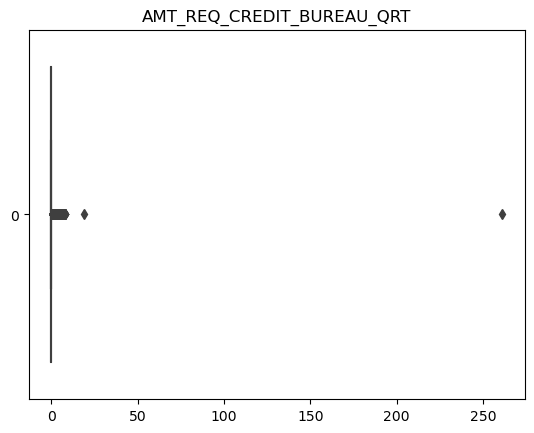

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          0.230203
std           0.745648
min           0.000000
50%           0.000000
80%           0.000000
90%           1.000000
99%           2.000000
99.9%         4.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


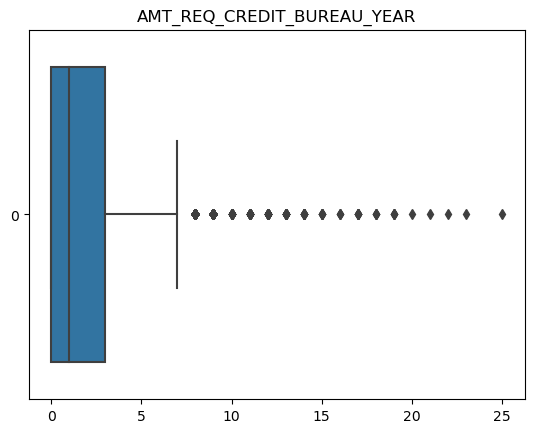

<Figure size 400x300 with 0 Axes>

describe
 count    304531.000000
mean          1.648630
std           1.856842
min           0.000000
50%           1.000000
80%           3.000000
90%           4.000000
99%           8.000000
99.9%         9.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [49]:
#plotting the boxplot to detect outliers

for col in numerical_cols:
    sns.boxplot(application[col],orient='h');
    plt.title(col)
    plt.figure(figsize=(4,3))
    plt.show()
    print('describe\n',application[col].describe(percentiles = [0.999,0.99,0.9,0.8]))

# insights on Outliers 

1) from the plot we can see that in columns related to CREDIT_BUREAU, except for AMT_REQ_CREDIT_BUREAU_HOUR, all the other columns have very thin IQR and strong outliers

2) EXT_SOURCE columns have well defined IQR range and EXT_SOURCE_3 has potential outliers near to the minimum



# DATA imbalance



In [50]:
#normalizing the values of target column

application.TARGET.value_counts(normalize=True)*100


0    91.900004
1     8.099996
Name: TARGET, dtype: float64

In [51]:
#creating two datafrmaes for target0 and target1 for the purpose of analysing

target0=application.loc[application["TARGET"]==0]
target1=application.loc[application["TARGET"]==1]

In [52]:
data_imbalance =  round(len(target0)/len(target1),2)
data_imbalance
###The imbalance ratio is 11.35

11.35

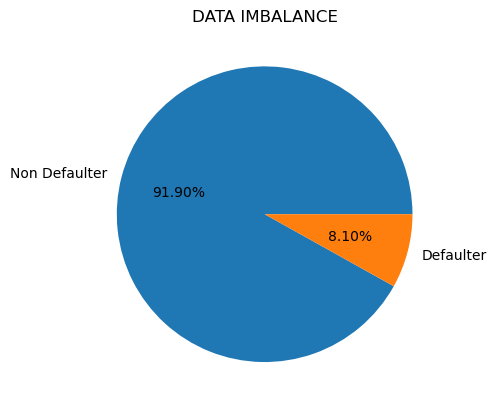

In [53]:
plt.pie(application.TARGET.value_counts(normalize=True)*100, labels= ['Non Defaulter','Defaulter'],autopct='%1.2f%%')
plt.title('DATA IMBALANCE')
plt.show()

Here we can see that the data imbalance ratio is 11.35, which is a favourable condition for the bank

# UNIVARIATE ANALYSIS 

In [54]:
#univariate analysis on AMT related columns 

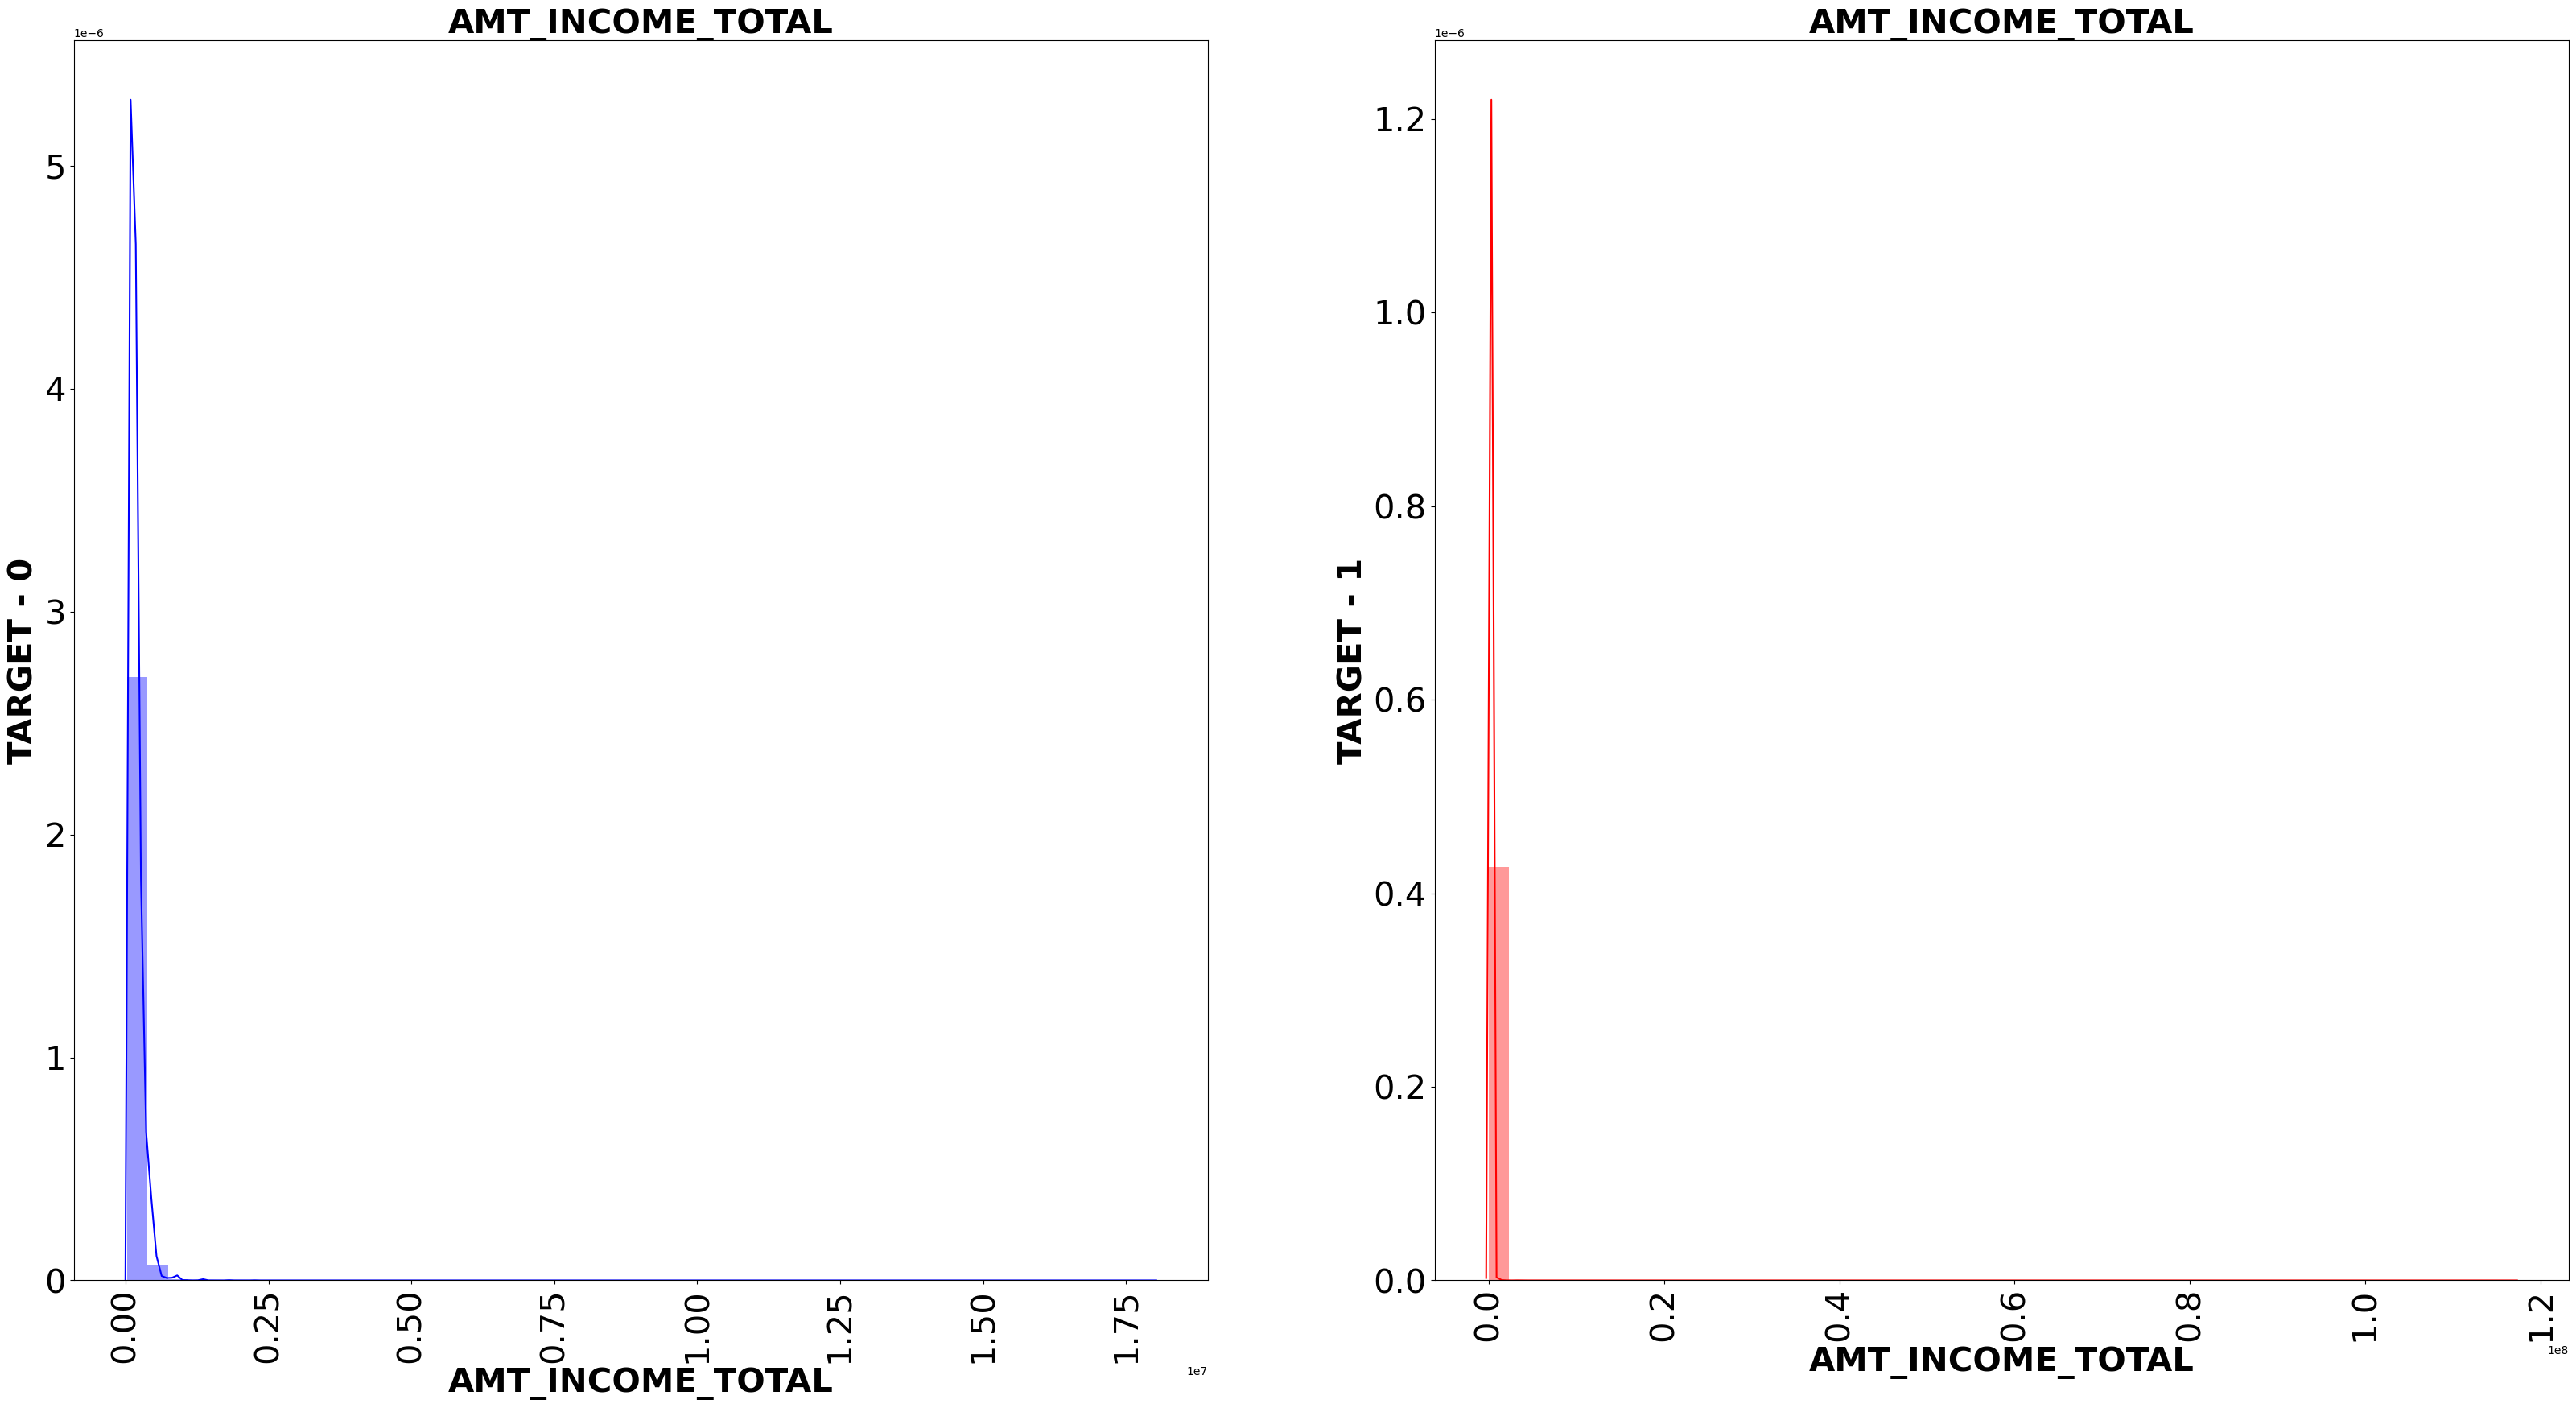

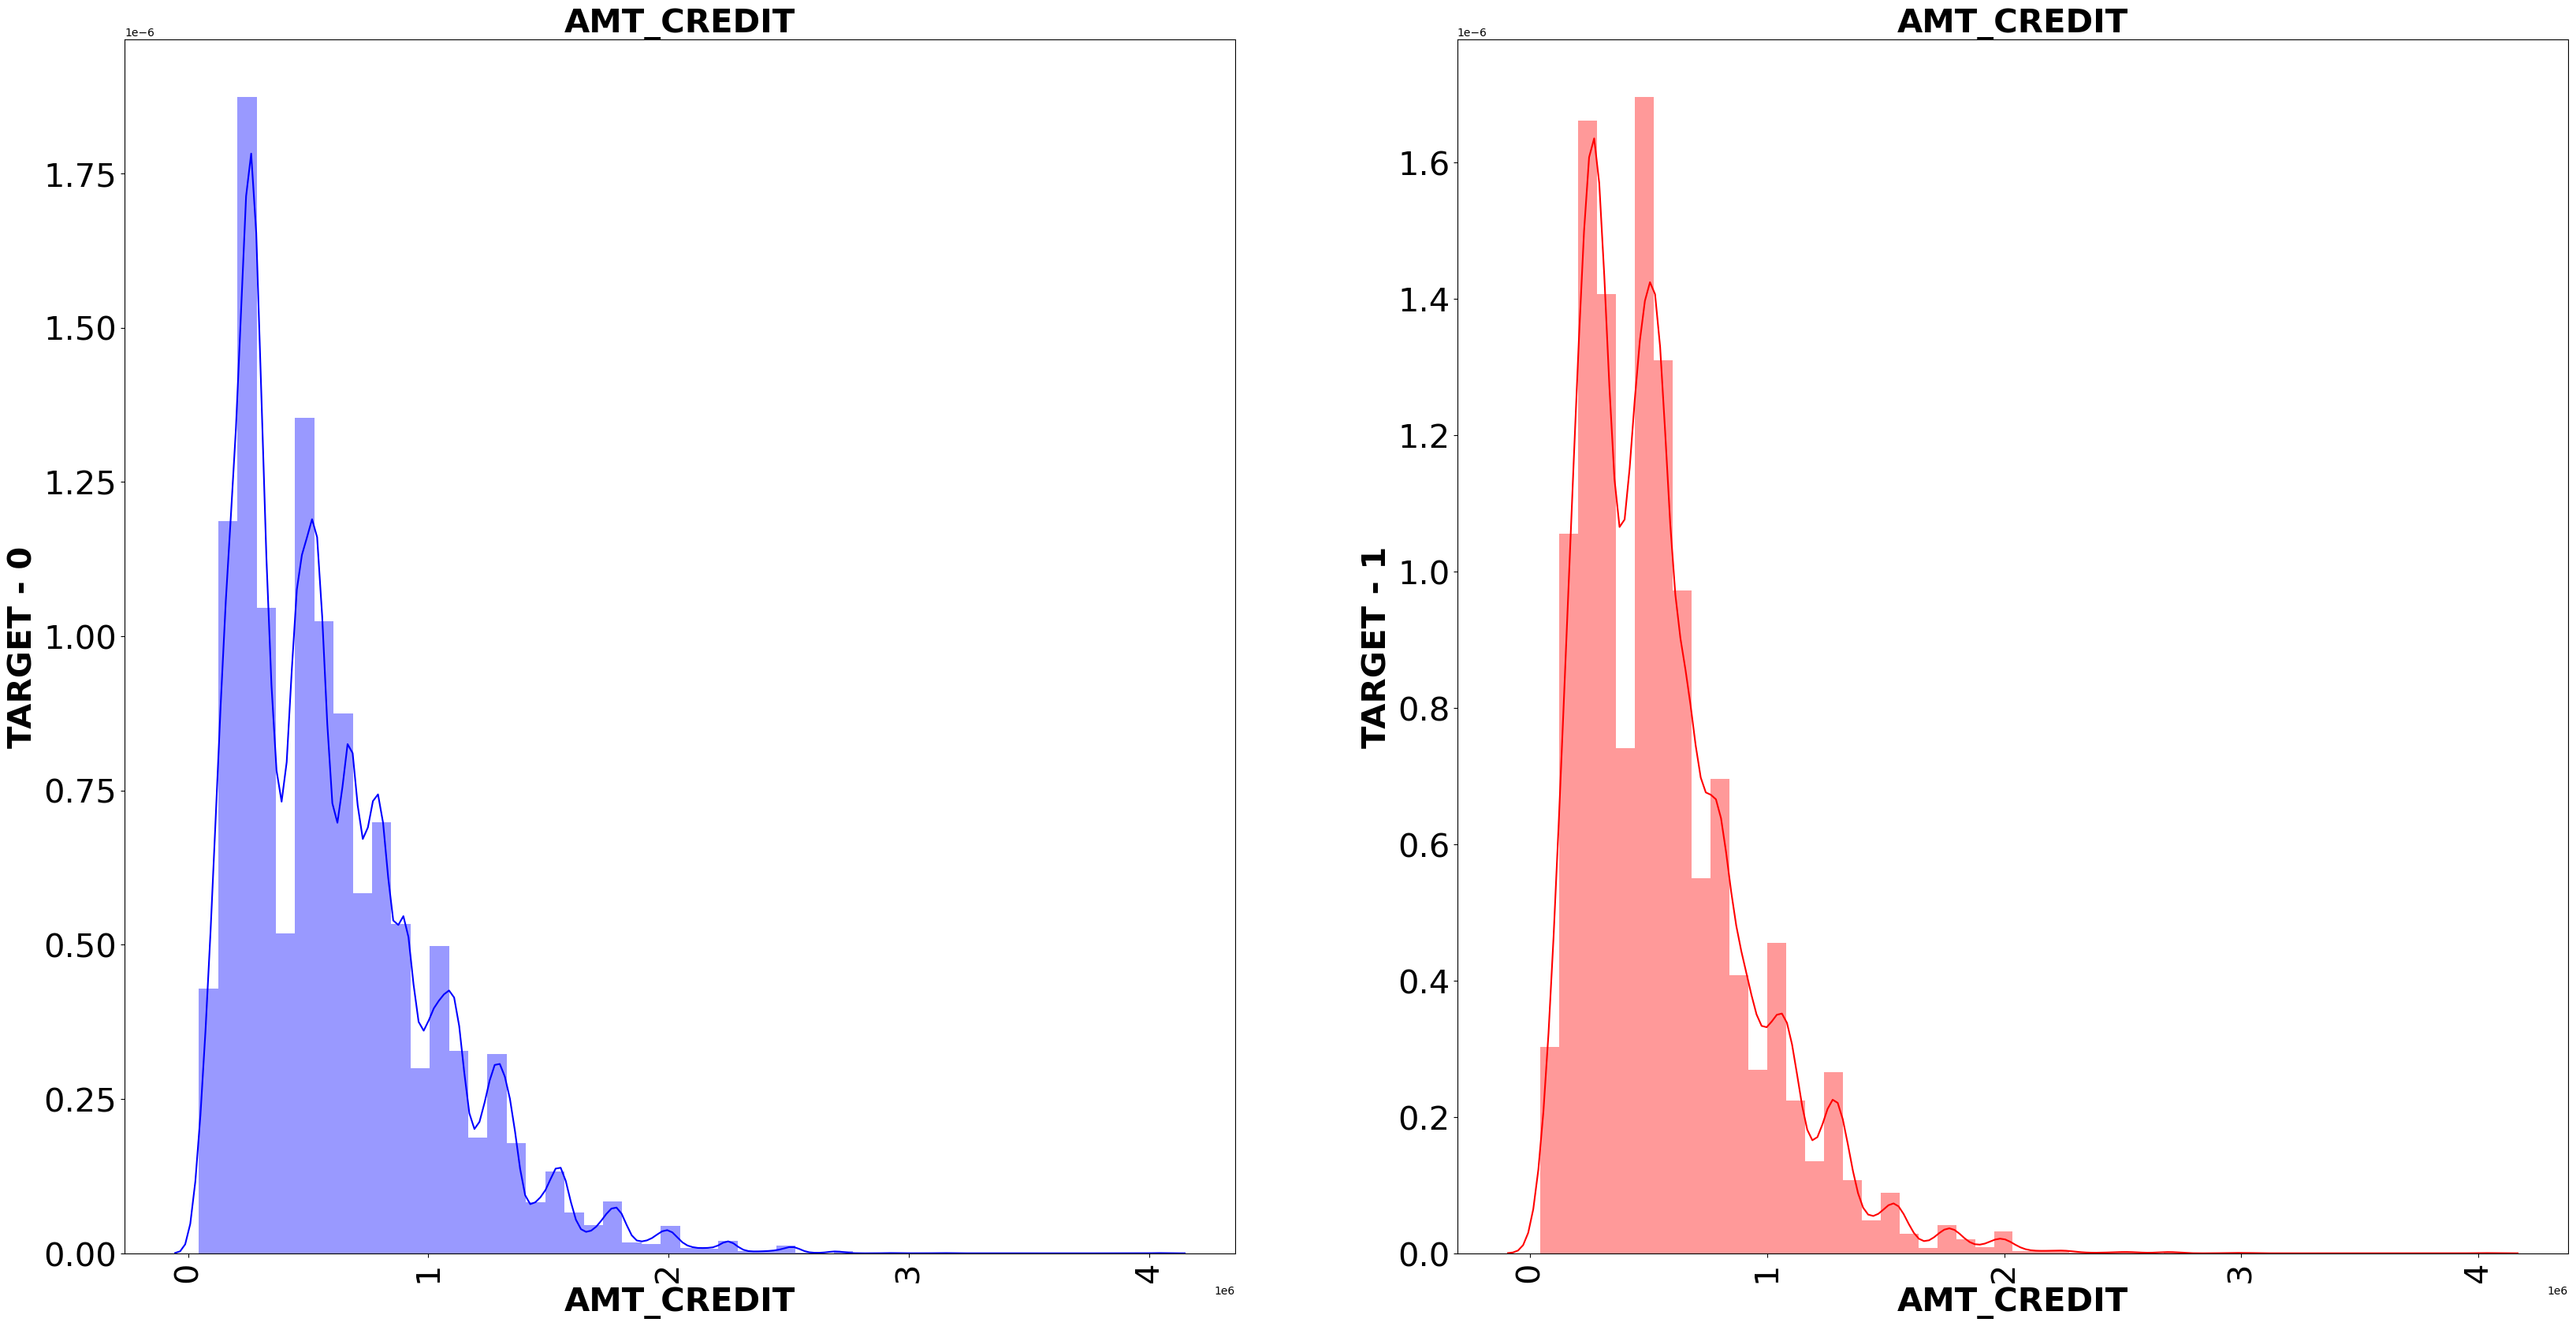

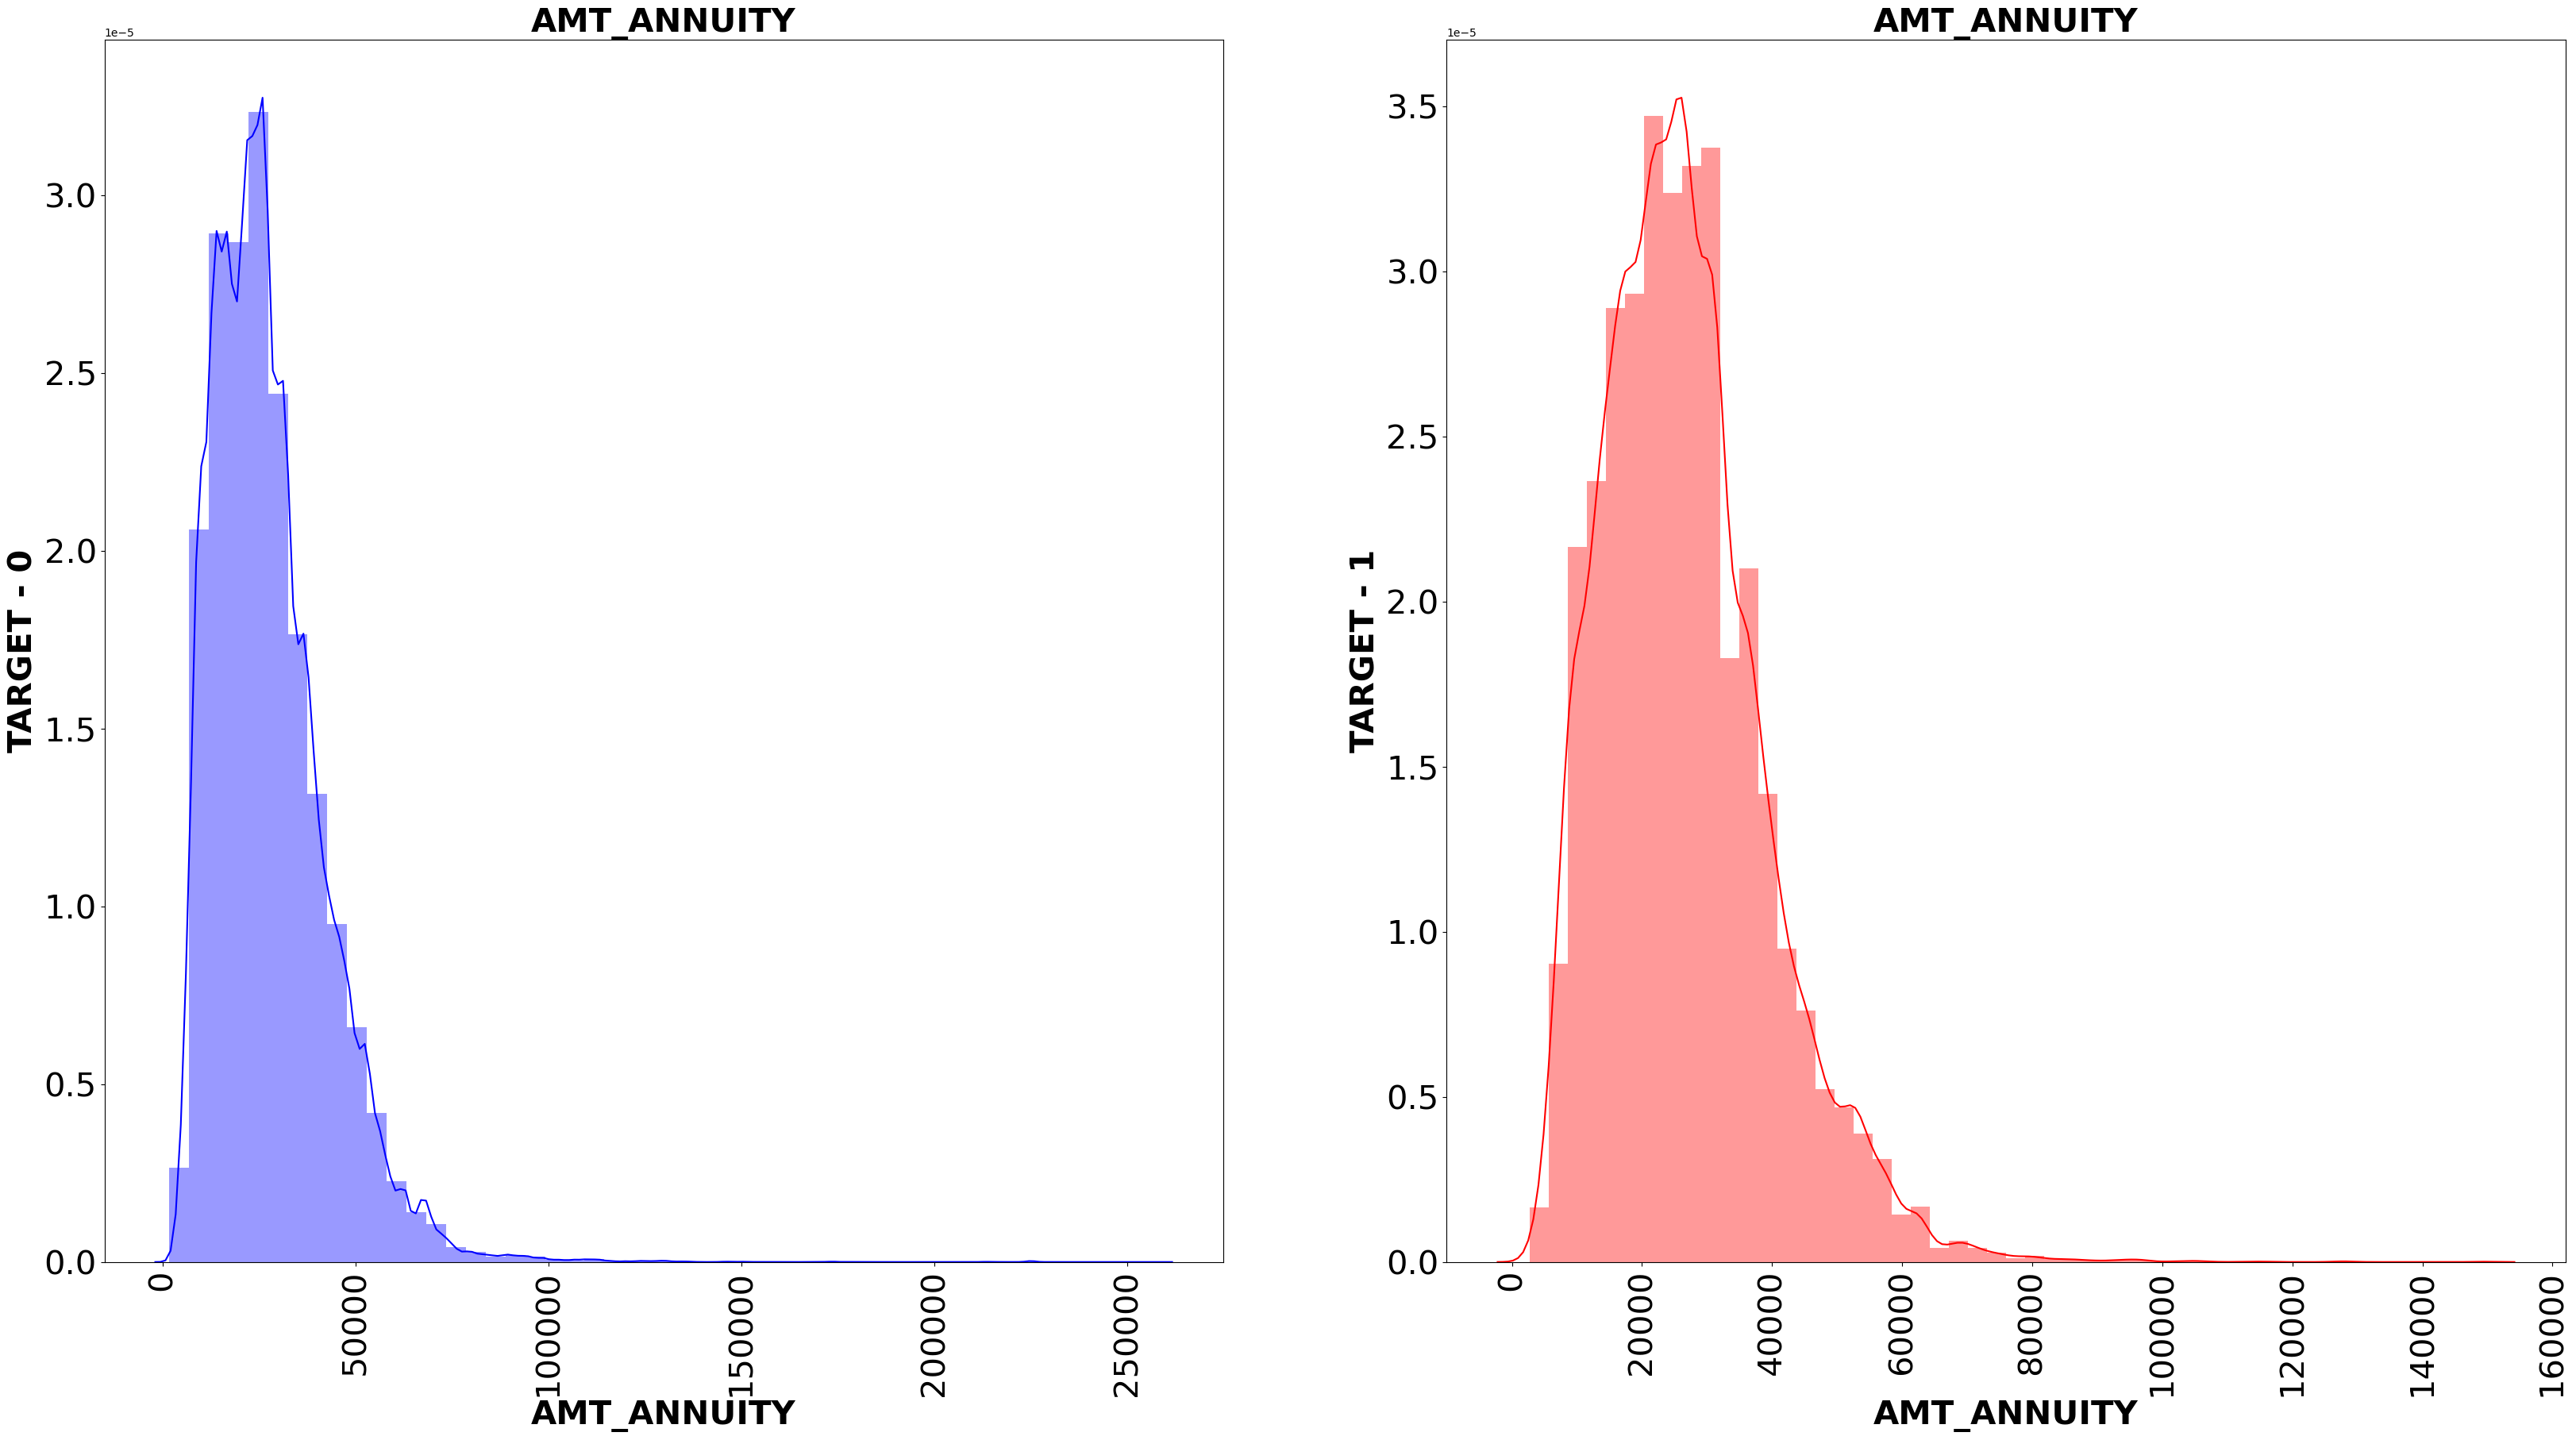

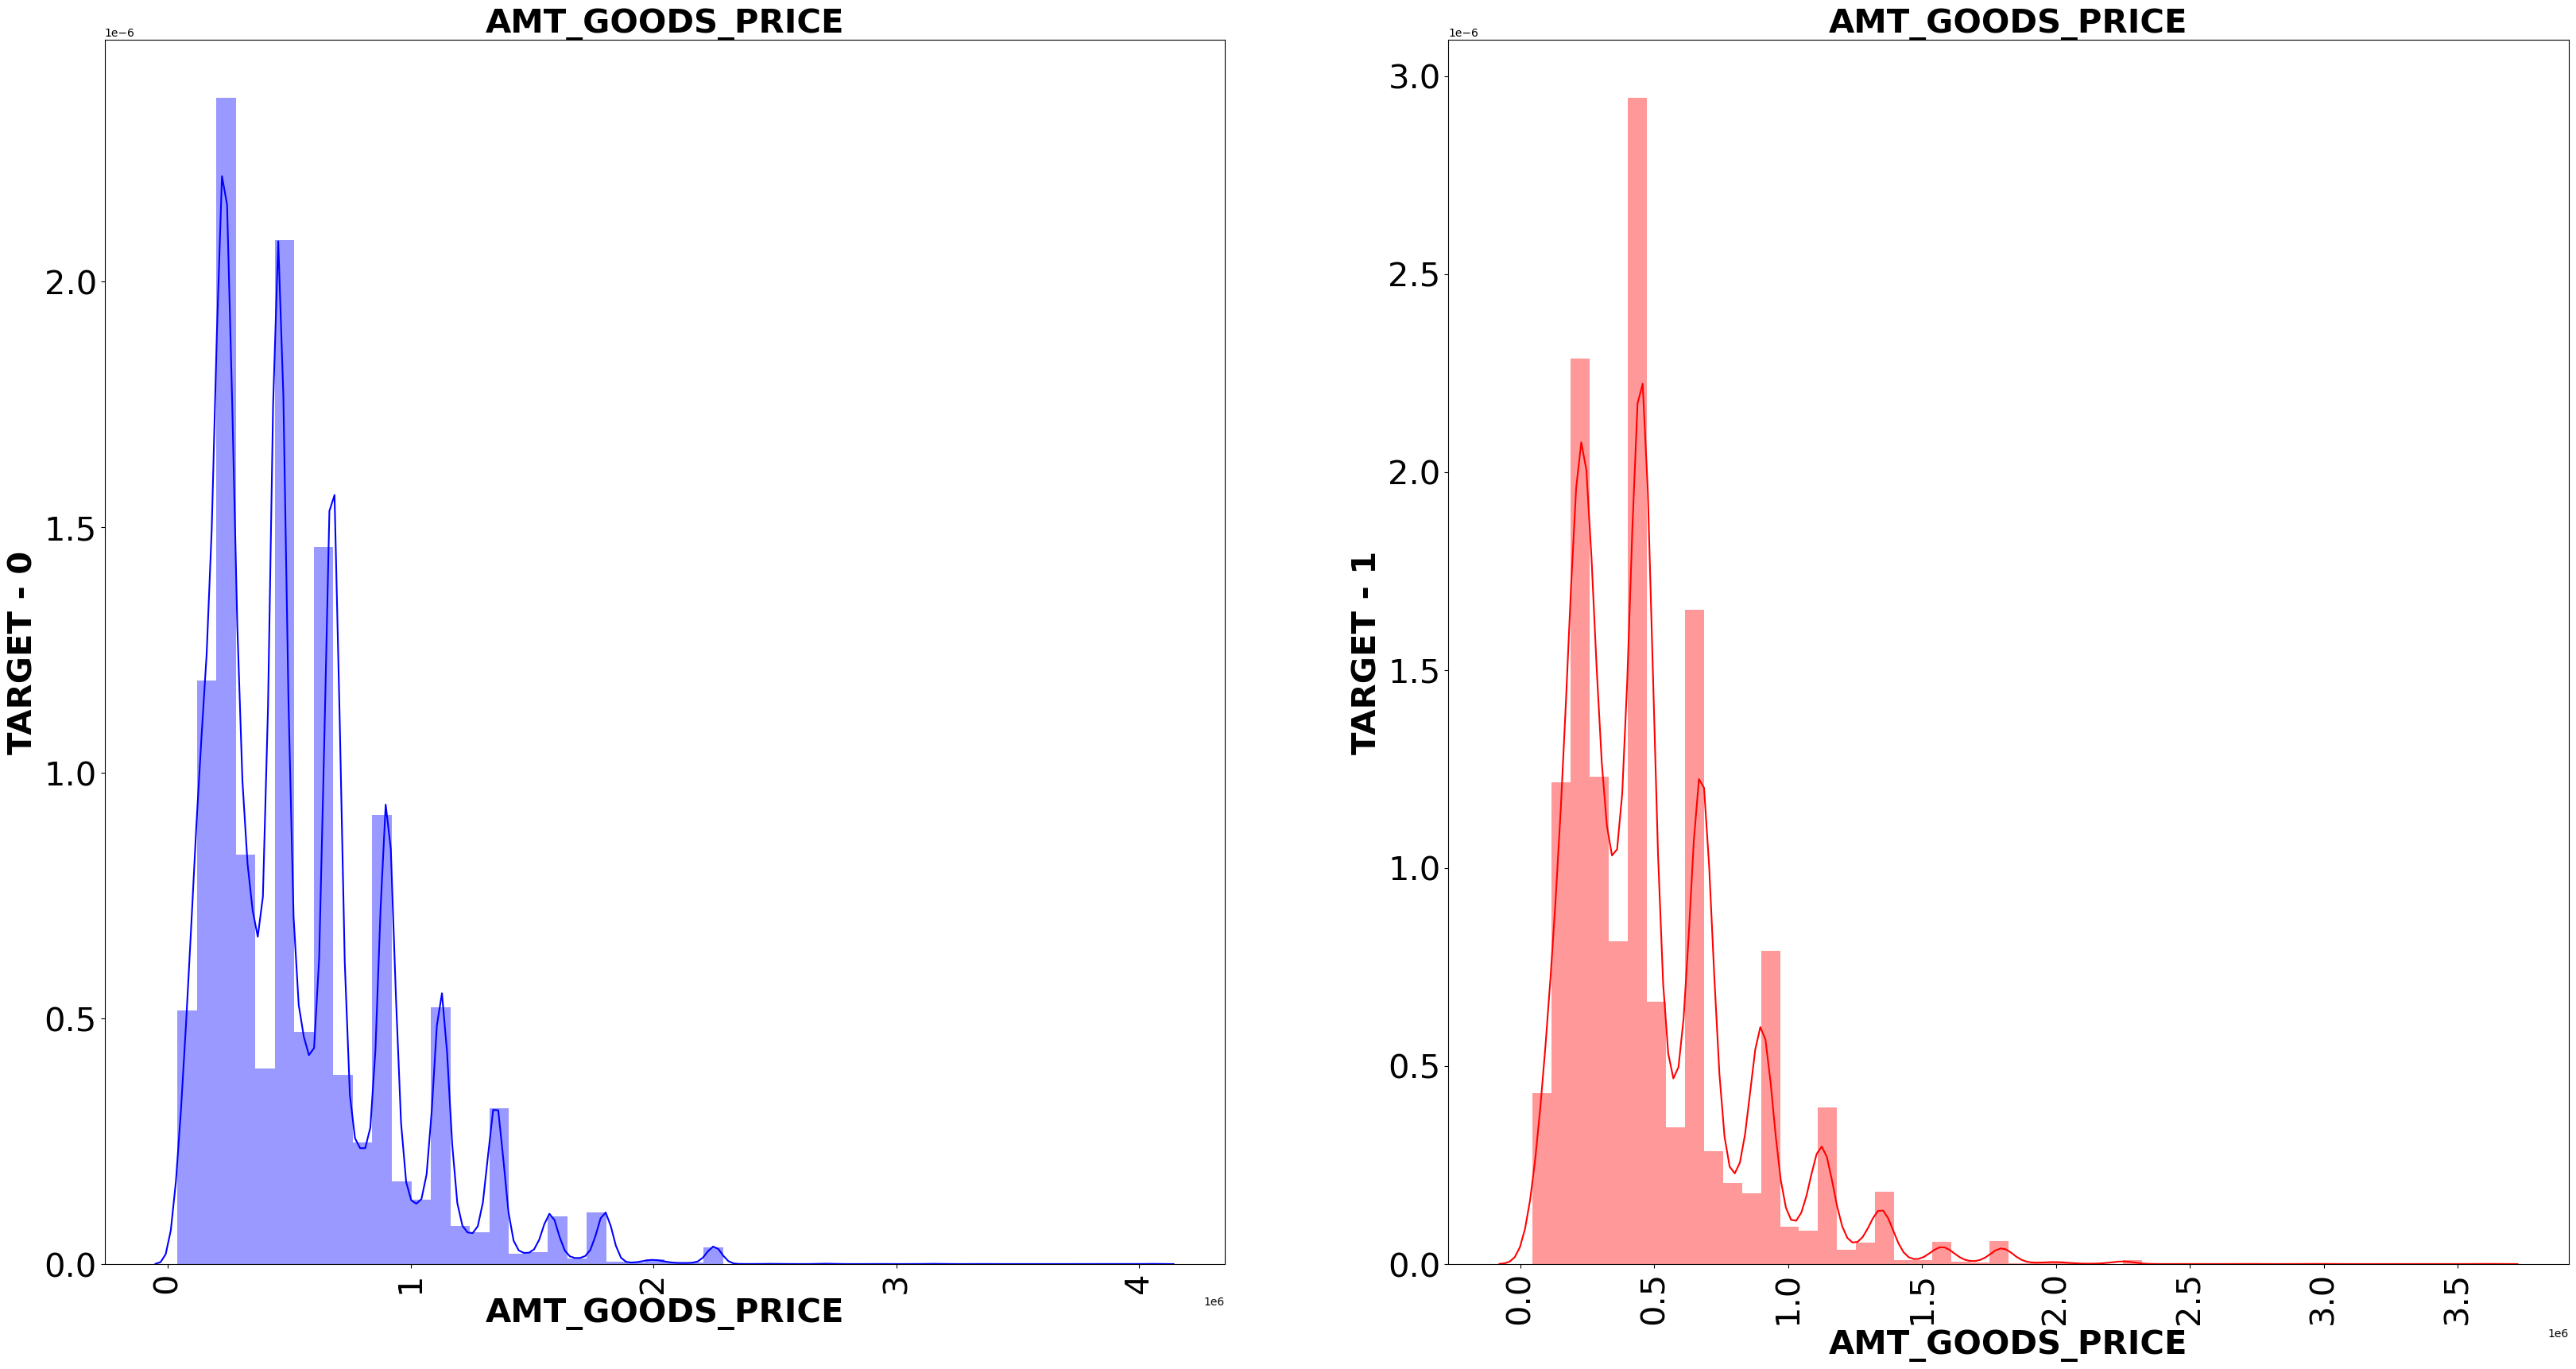

In [55]:
num_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in num_col:
    plt.figure(figsize=(40,20))
    plt.subplot(1,2,1)
    plt.title(col,fontsize=30,fontweight ='bold')
    sns.distplot(target0[col],color='b')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('TARGET - 0', fontsize= 30, fontweight="bold")                    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    
    plt.subplot(1,2,2)
    plt.title(col,fontsize=30,fontweight='bold')
    sns.distplot(target1[col],color='r',) 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('TARGET - 1', fontsize= 30, fontweight="bold")                    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()


# INSIGHTS 

1) For the column, AMT_INCOME_TOTAL, most of the data is between, 0 to 250000, for both target1 and target0
2) The graph has a more clearer peak incase of TARGET0 than for TARGET1 data frame



In [56]:
#create a list name plots with the required columns, for easy plotting
plots =['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'AMT_CREDIT_CAT', 'AMT_INCOME_CAT','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']


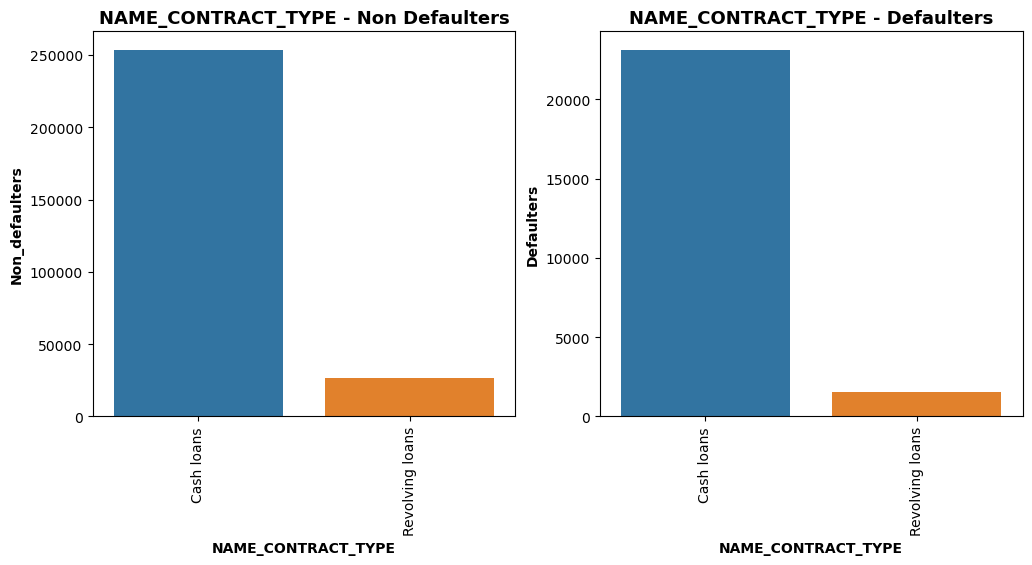

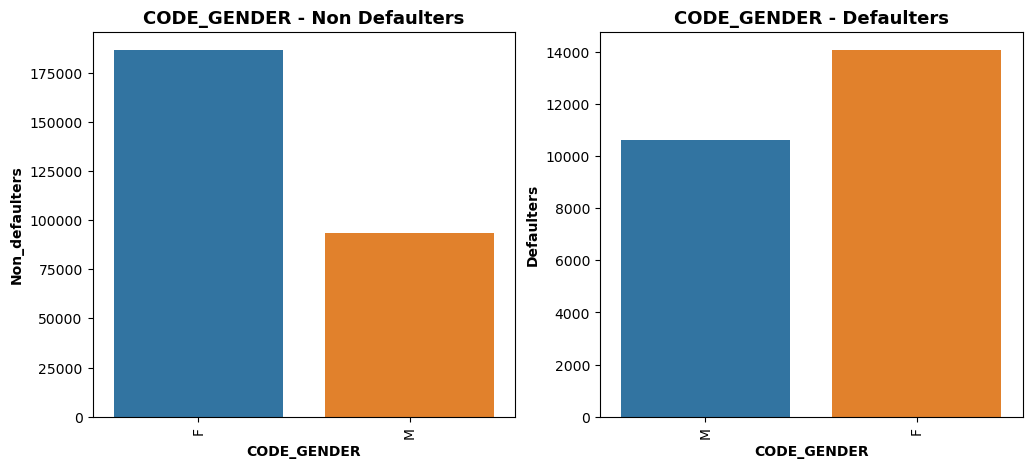

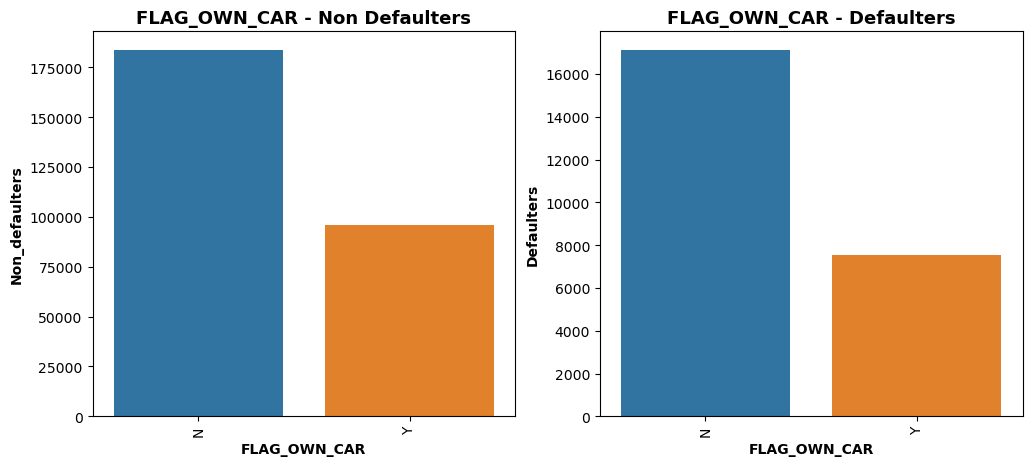

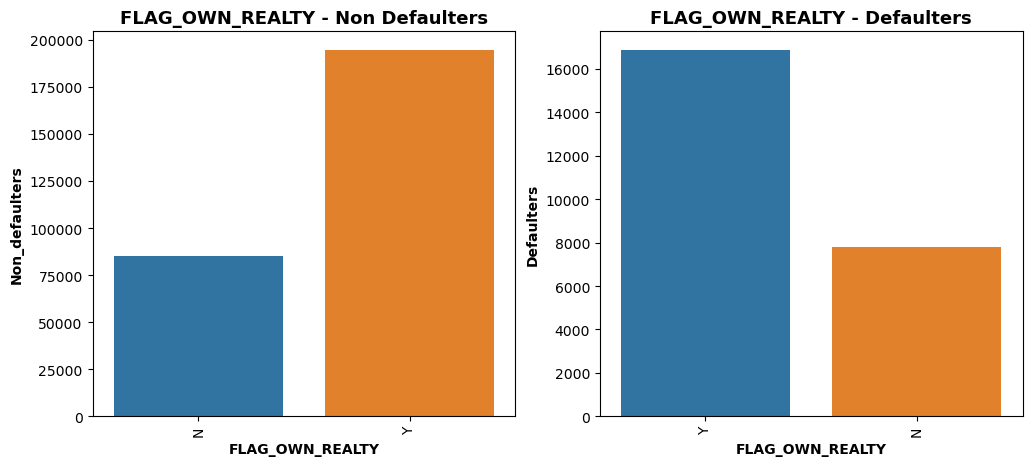

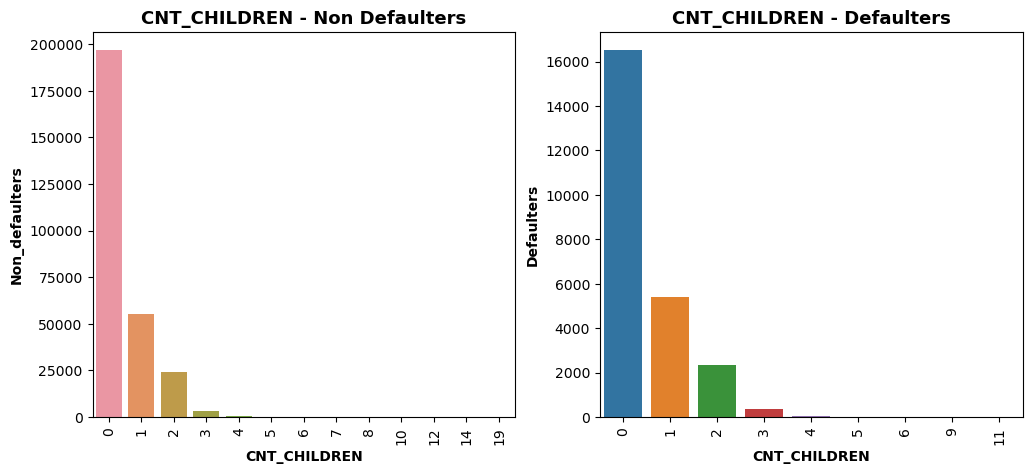

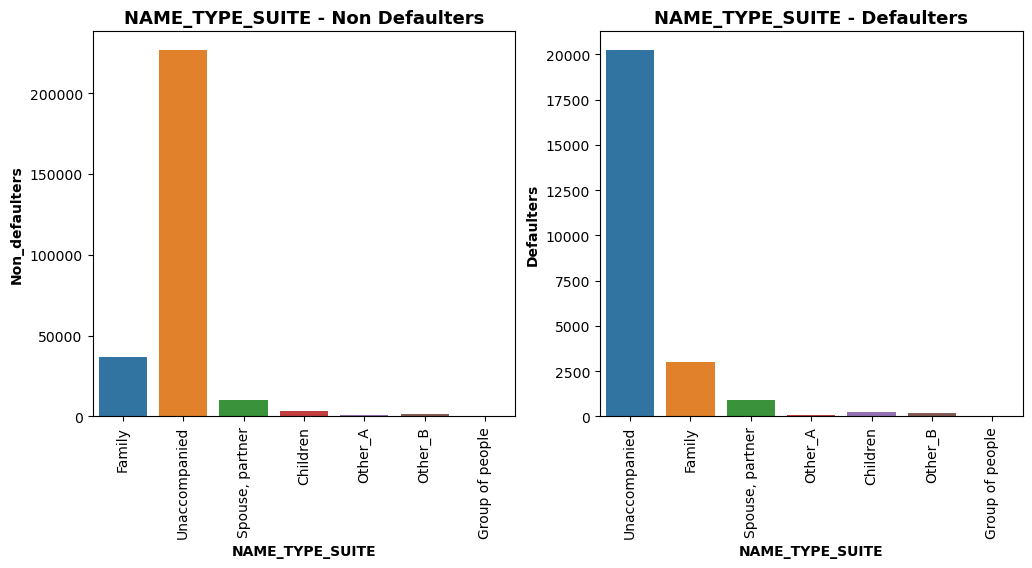

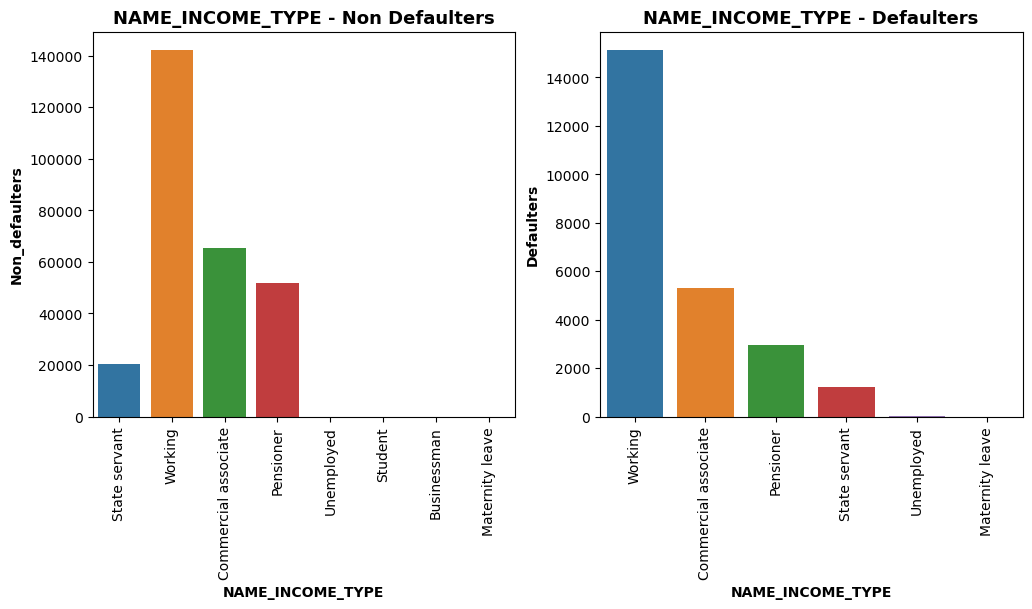

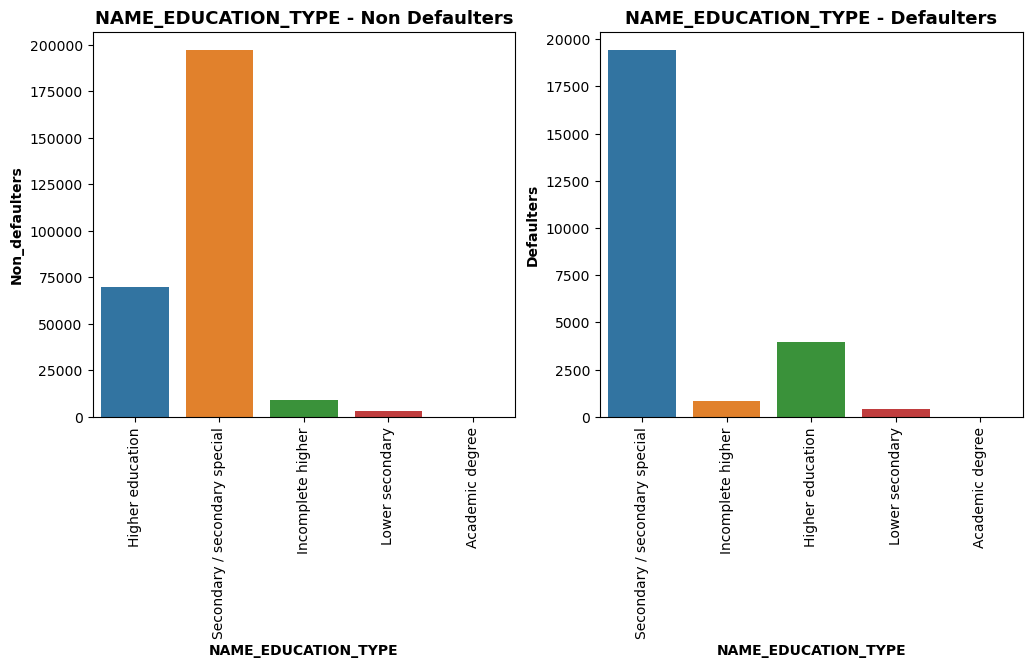

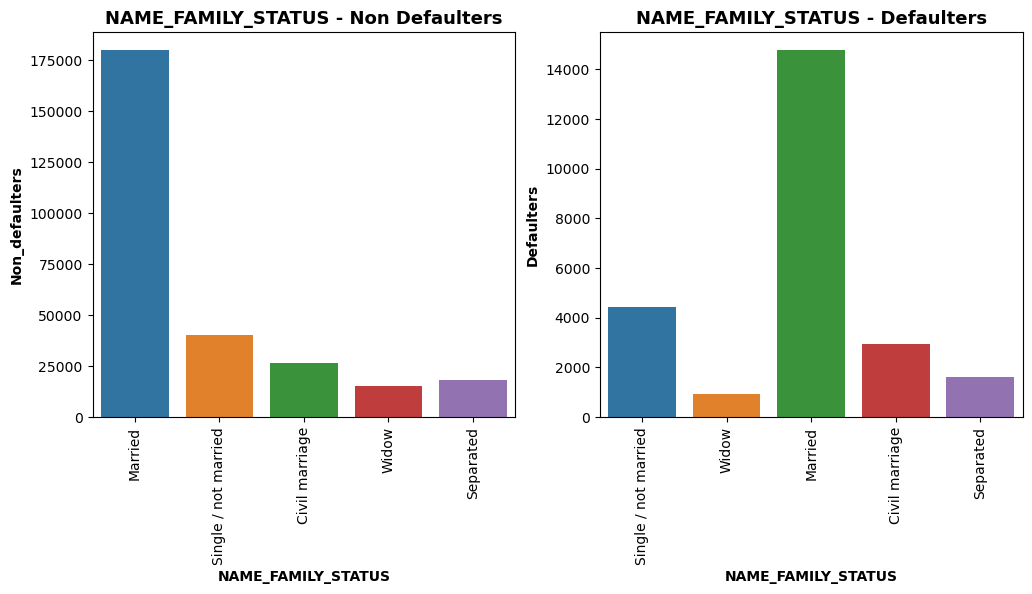

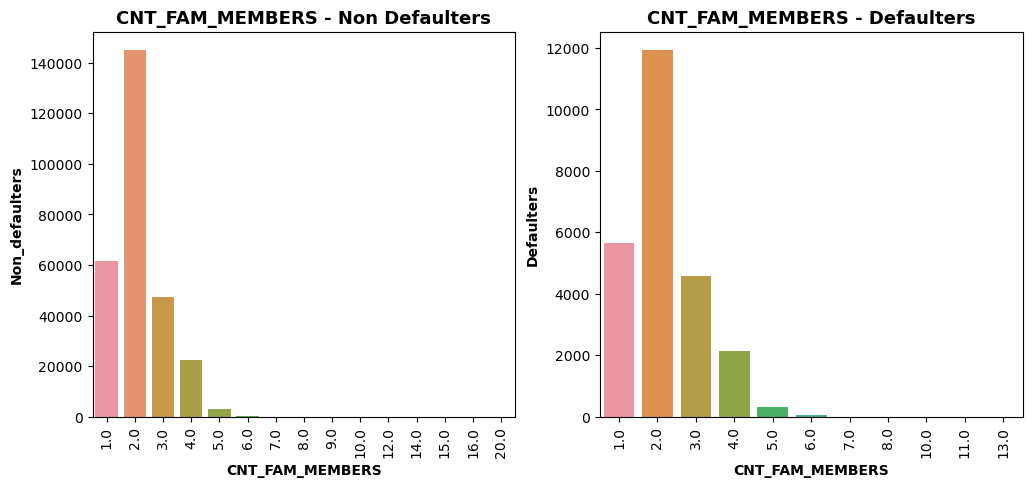

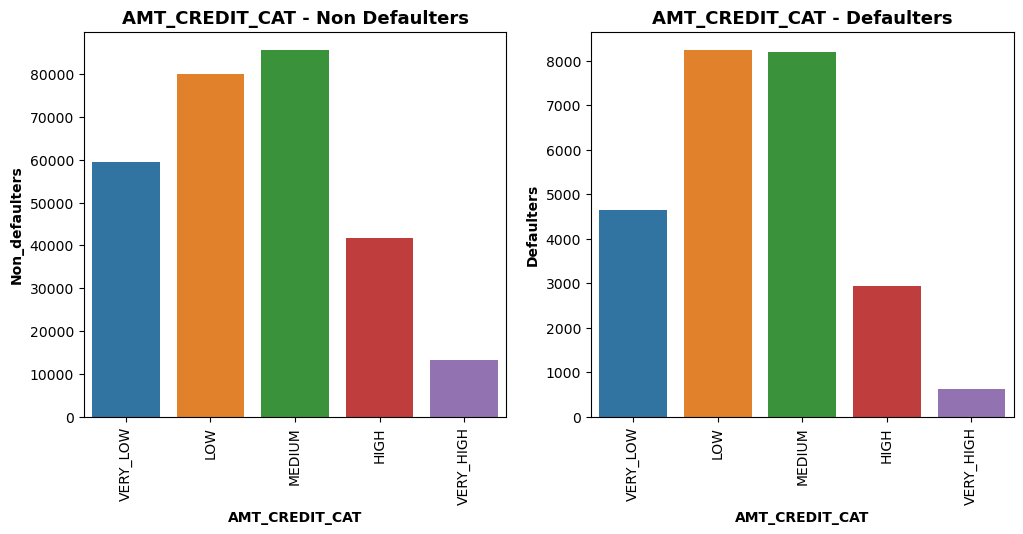

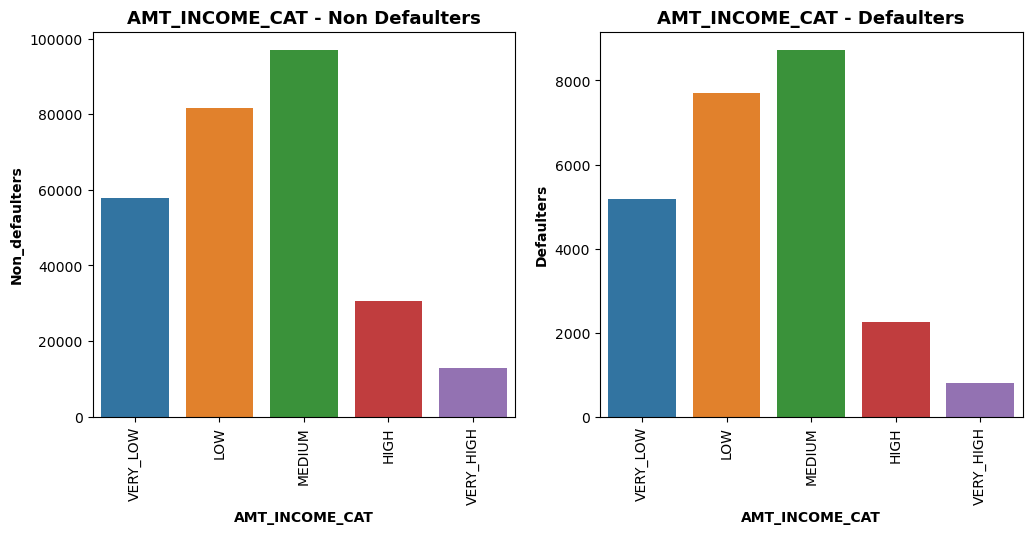

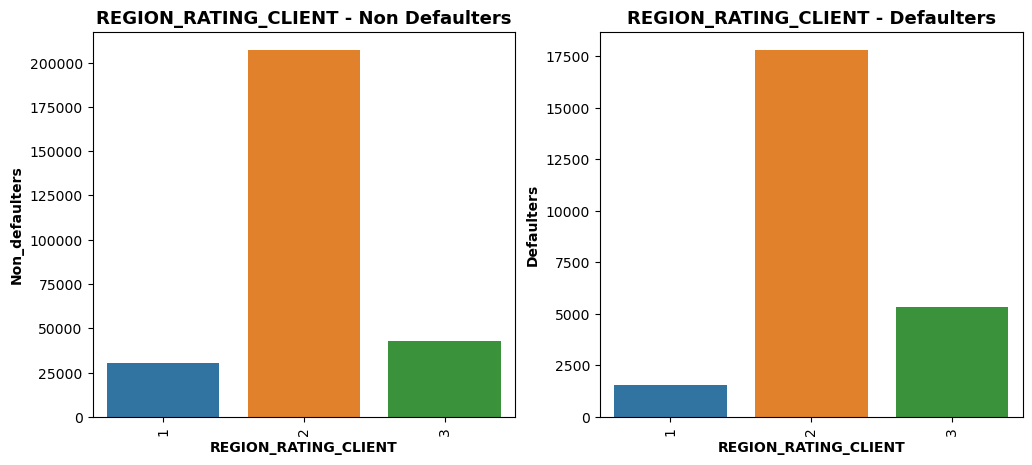

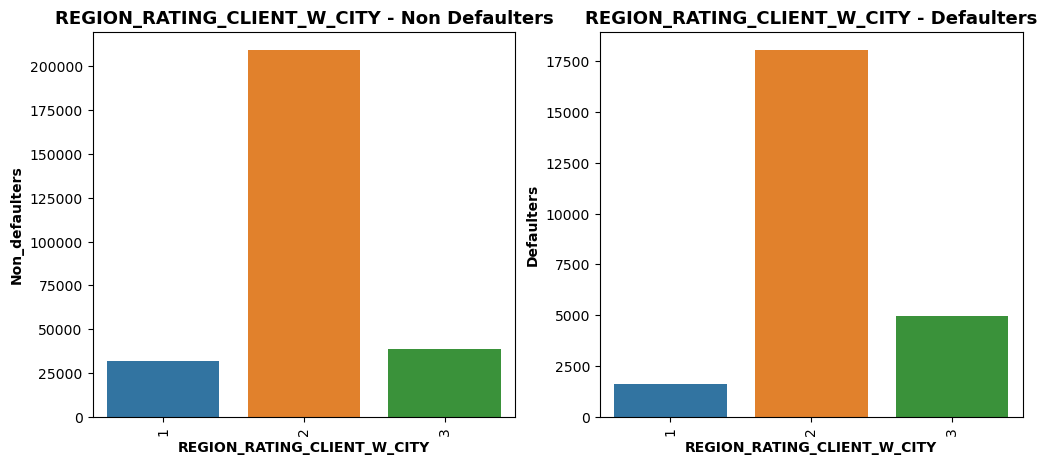

In [57]:
for col in plots:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = target0, x= col)
    plt.title('{} - Non Defaulters'.format(col),fontsize=13,fontweight ='bold')
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize= 10, fontweight="bold")
    plt.ylabel('Non_defaulters', fontsize= 10, fontweight="bold")
    
    
    plt.subplot(1,2,2)
    sns.countplot(data = target1, x= col)
    plt.title('{} - Defaulters'.format(col),fontsize=13,fontweight ='bold')
    plt.xticks(rotation=90)
    plt.xlabel(col, fontsize= 10, fontweight="bold")
    plt.ylabel('Defaulters', fontsize= 10, fontweight="bold")
    plt.show()
    

# INSIGHTS

1) NAME_CONTRACT_TYPE - IN both the graph cash loans has been requested more than revolving loans
2) CODE_GENDER - most of the males are in non defaulter, whereas most of the females are in defaulters group. 
   And overall, males apply for loans more than females
3) FLAG_OWN_CAR - People who do not own the cars are most likely to apply for loans in both defaulter and non defaulters group
4) FLAG_OWN_Realty - people who own the realty are most likely to apply for loans
5) CNT_CHILDREN - people with no child are more likely to apply for loan
6) NAME_TYPE_SUITE - people who are unaccompined are more in cases
7) NAME_INCOME_TYPE - Working professionals are the leading applicants, followed by commercial associates
8) NAME_EDUCATION_TYPE -  Secondary eductation category has the most clients, both in defaulters and no defaulters
9) NAME_FAMILY_STATUS - married people tend to apply for loan more than others
10) CNT_FAM_MEMBERS: Both Defaulters and Non_defaulters have Family members of 2 as the most
    
9) AMT_CREDIT_CAT: Most of the people have taking loan ranging from medium range in both defaulter and non-defaulters
11) AMT_INCOME_CAT: Most of the people have taking loan ranging from medium range in both defaulter and non-defaulters,similar to credit range 
12) REGION_RATING_CLIENT - people with rating 2 have applied for loan more than others
13) REGION_RATING_CLIENT_W_CITY - similar to REGION_RATING_CLIENT, people with rating 2 have applied for loan more than others 

# BIVARIATE ANALYSIS

In [58]:
#categorical variables to analyse

cat_col = ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE','NAME_HOUSING_TYPE']

#range variables to analyse
range_col = ['AMT_INCOME_CAT','AMT_CREDIT_CAT','AGE_RANGE']

#numerical variables to analyse
numeric_col = ['AMT_INCOME_TOTAL','AMT_CREDIT']

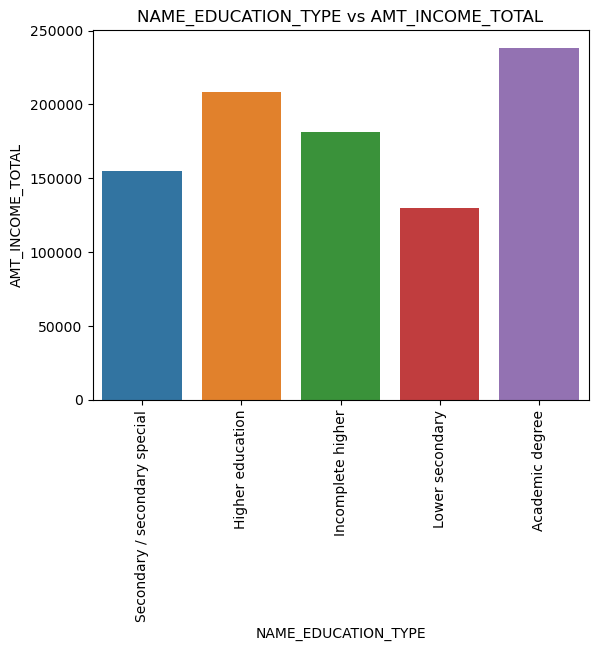

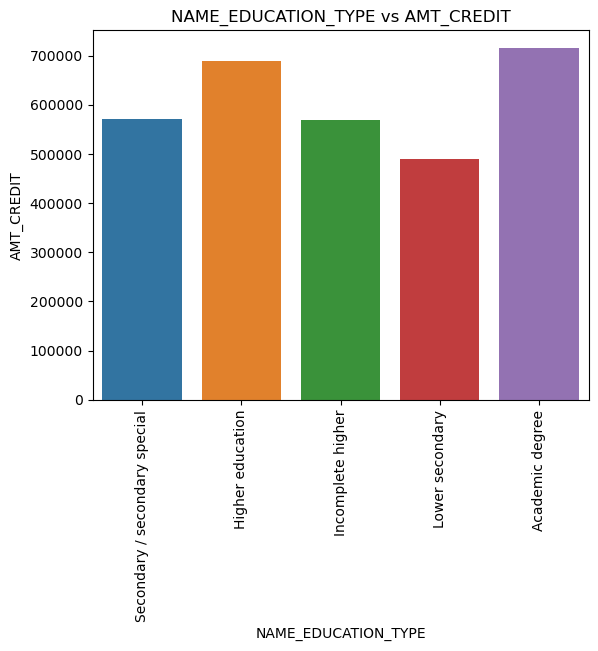

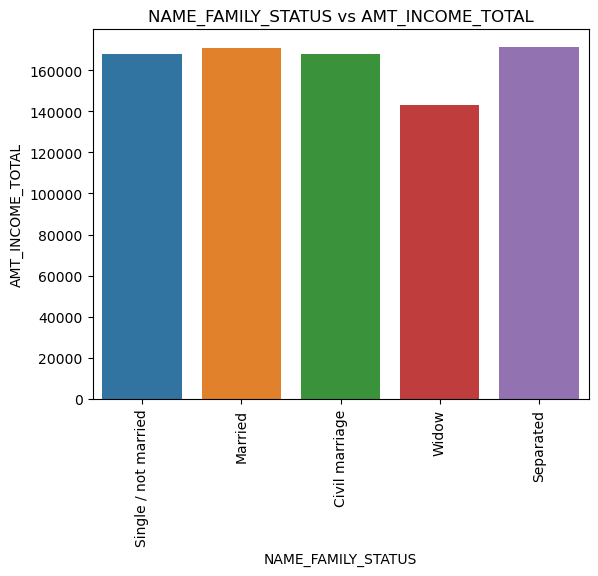

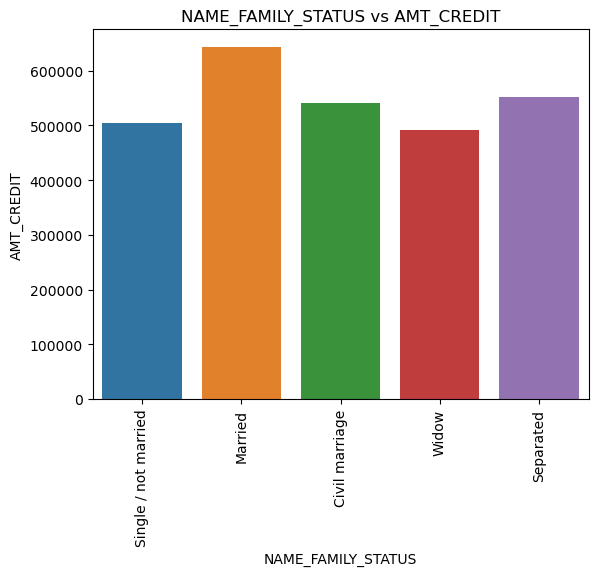

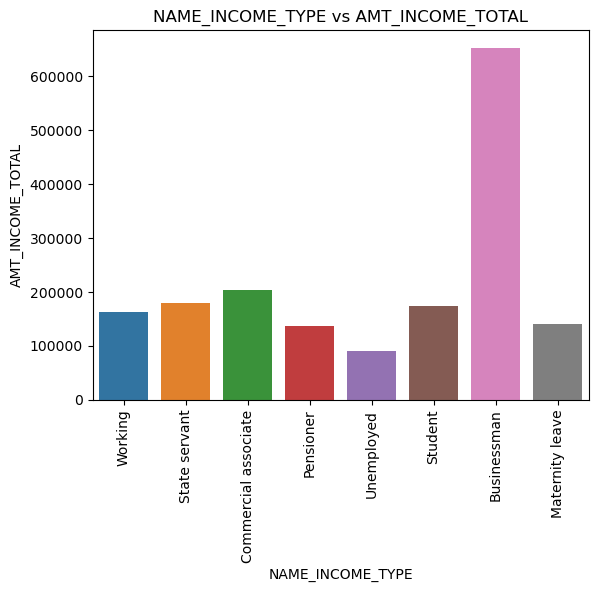

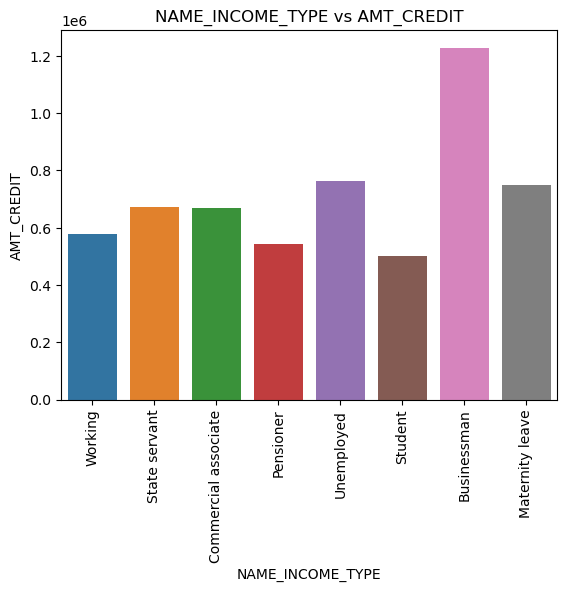

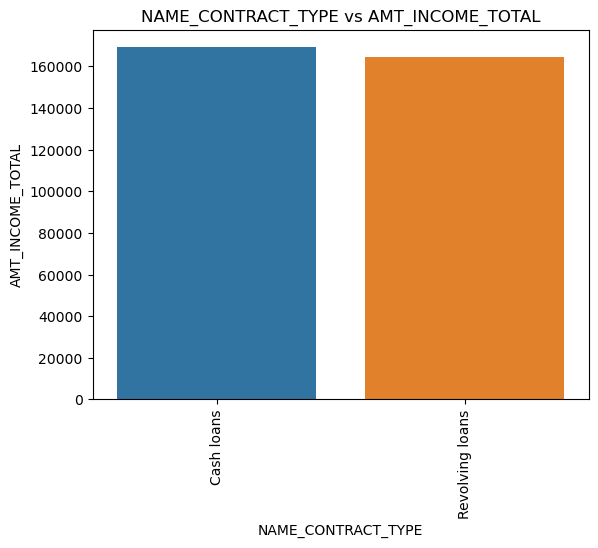

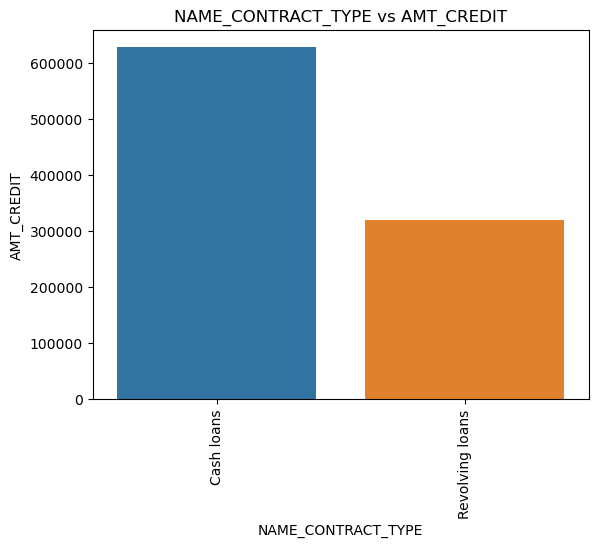

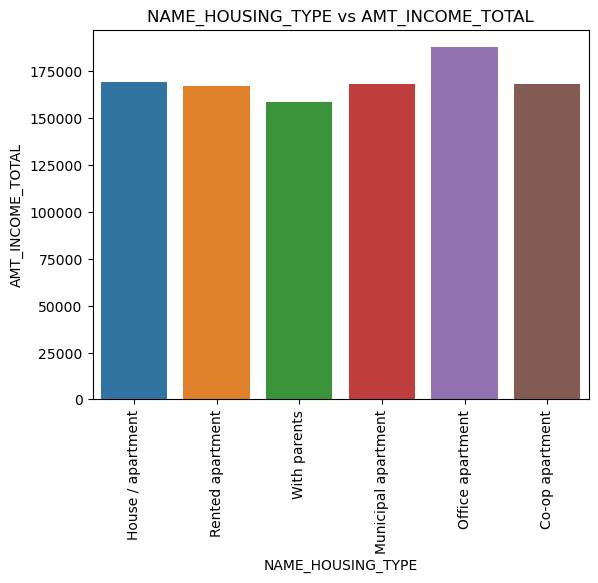

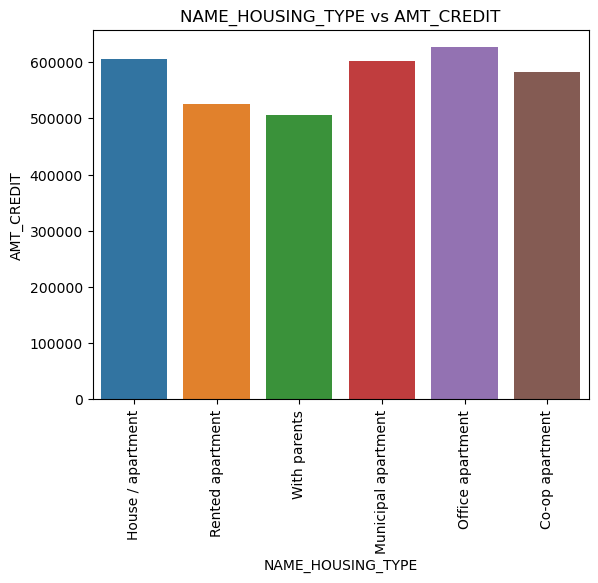

In [59]:
for col1 in cat_col:
    for col2 in numeric_col:
        sns.barplot(data =application, x = col1 , y = col2 , ci=None)
        plt.xticks(rotation = 90)
        plt.title(col1 +' vs '+ col2)
        plt.show()

# Insights

1) NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL - academic degree shows corresponds to higher income, followed by higher education , incomplete education and secondary education
2) NAME_EDUCATION_TYPE vs AMT_CREDIT  - similar to AMT_INCOME_TOTAL, academic degree shows corresponds to higher income, followed by higher education , incomplete education and secondary education
3) NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL - Does not exhibit any valuable or strong trend 
4) NAME_FAMILY_STATUS vs AMT_CREDIT - married clients tend to have higher credit
5) NAME_INCOME_TYPE vs AMT_INCOME_TOTAL - business cleints have higher income than others
6) NAME_INCOME_TYPE vs AMT_CREDIT - business cleints have higher credit than others
7) NAME_CONTRACT_TYPE vs AMT_INCOME_TOTAL - both cash loans and revolving loans have similar income
8) NAME_CONTRACT_TYPE vs AMT_CREDIT - cash loans have higher credit than revovling loans
9) NAME_HOUSING_TYPE vs AMT_INCOME_TOTAL - housing type does not display any valuable or strong trend,
10) NAME_HOUSING_TYPE vs AMT_CREDIT - housing type does not display any valuable or strong trend

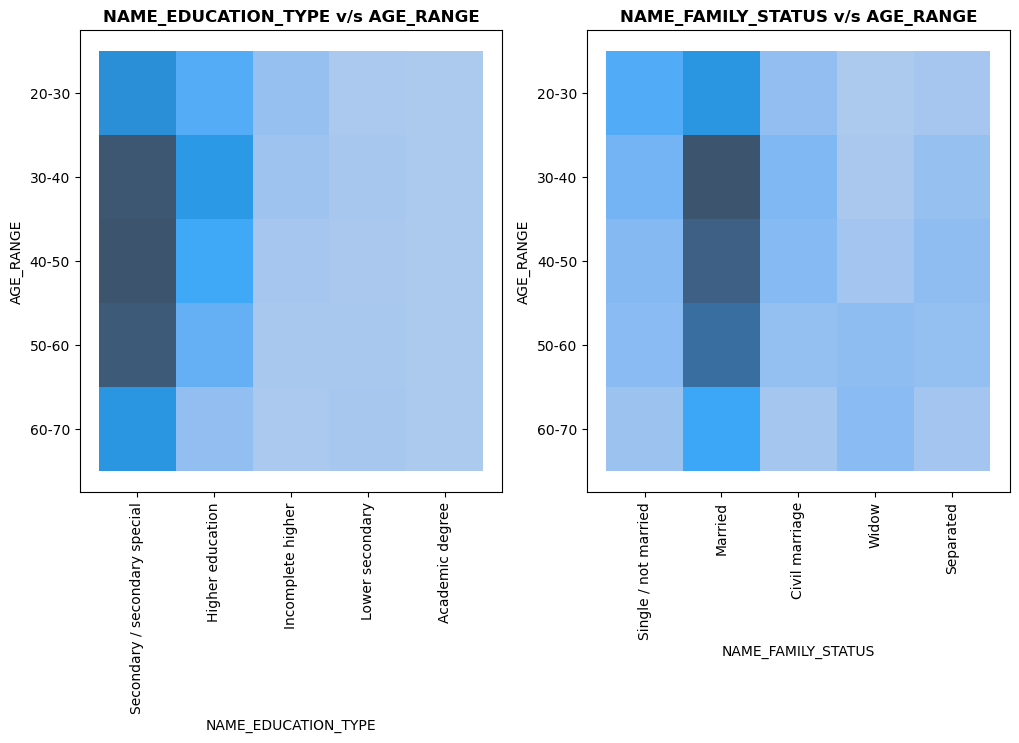

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("NAME_EDUCATION_TYPE v/s AGE_RANGE", fontweight="bold")
sns.histplot(
    data=application,
    x=application.NAME_EDUCATION_TYPE,
    y=application.AGE_RANGE, kde = True)
plt.xticks(rotation = 90)

plt.subplot(122)
plt.title("NAME_FAMILY_STATUS v/s AGE_RANGE", fontweight="bold")
sns.histplot(
    data=application,
    x=application.NAME_FAMILY_STATUS,
    y=application.AGE_RANGE, kde = True)
plt.xticks(rotation = 90)


plt.show()

# insights
1) NAME_EDUCATION_TYPE v/s AGE_RANGE - most of them have seconday education and lie in the age range of 40-50
2) NAME_FAMILY_STATUS v/s AGE_RANGE - most of the people are married and in the age range of 30-40, followed by 40-50

# Multivariate Analysis

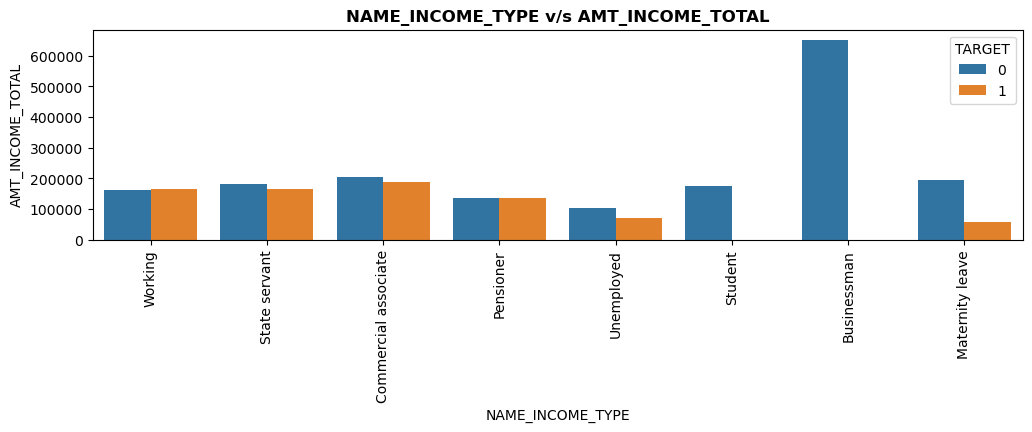

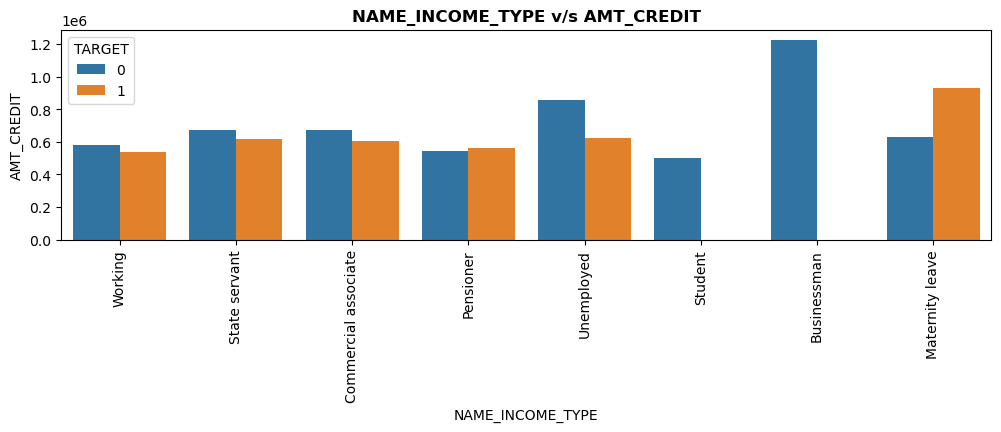

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("NAME_INCOME_TYPE v/s AMT_INCOME_TOTAL", fontweight="bold")
sns.barplot(x= application['NAME_INCOME_TYPE'],y = application['AMT_INCOME_TOTAL'],hue=application['TARGET'],estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12,6))
plt.subplot(2,1,2)
plt.title("NAME_INCOME_TYPE v/s AMT_CREDIT", fontweight="bold")
sns.barplot(x=application['NAME_INCOME_TYPE'],y=application['AMT_CREDIT'],hue=application['TARGET'],estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.show()

# Insights

1) We can see that there are no defaulters in the businessman and students category
2) businessman often have higher income whereas students have very low income
3) Average income of non defaulters is slightly higher than the average of defaulters. 
4) We could see people who are on Maternity are among the dafaulters followed by pensioners
5) On an average,unemployed people have taken more loan than their income


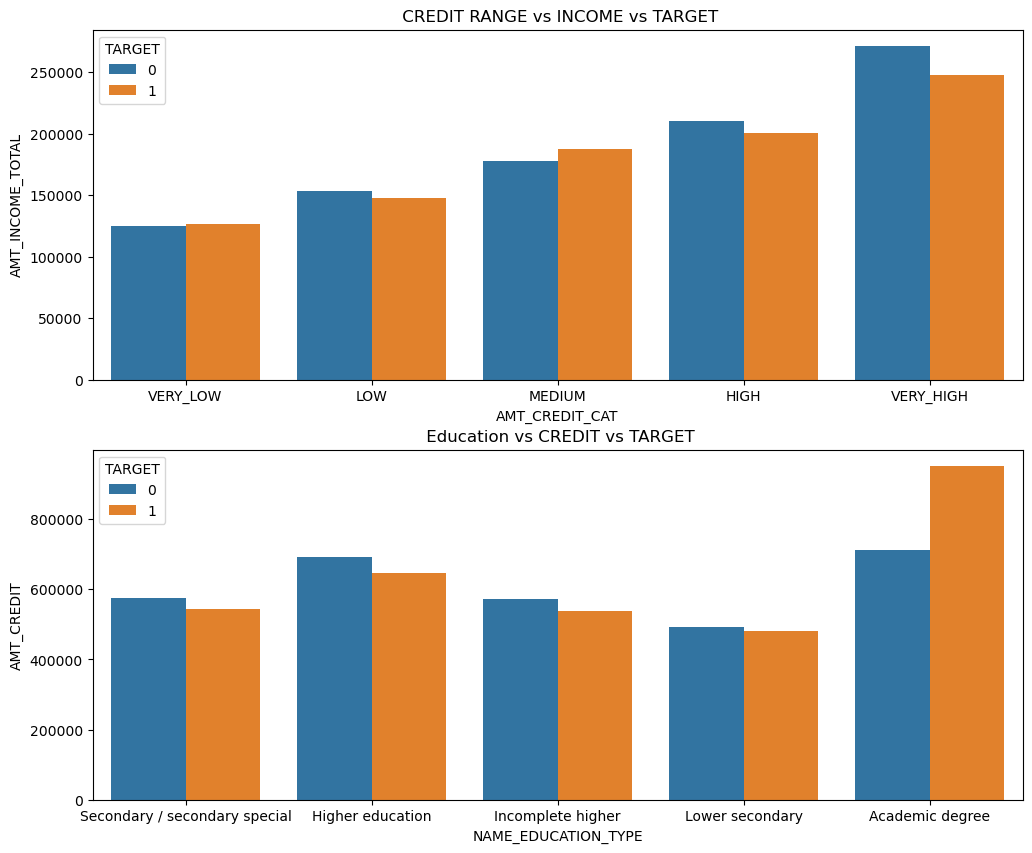

In [62]:
plt.figure(figsize=(12,10))
 
plt.subplot(2,1,1)
plt.title(' CREDIT RANGE vs INCOME vs TARGET') 
sns.barplot(data = application, x='AMT_CREDIT_CAT',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v', ci=None) ;

plt.subplot(2,1,2)
plt.title(' Education vs CREDIT vs TARGET') 
sns.barplot(data = application, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v', ci=None) ;



# Insights

1) CREDIT RANGE vs INCOME vs GENDER - Overall we can say that,female salary is higher than male salary,
2)  Education vs CREDIT vs GENDER - clients with academic degree or higher education tends to have higher loan amount



# CORRELATION

In [63]:
#finding the correlation in defalter dataframe
#unstacking and sorting the values
#dropping the null values and removing the value whihc havecorrelation as 1
defaulter = target1.corr().abs()
defaulter = defaulter.unstack().sort_values(ascending=False).dropna()
defaulter = defaulter[defaulter!=1.0]
defaulter10 =defaulter.head(10)
defaulter10


OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998286
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998286
AMT_GOODS_PRICE              AMT_CREDIT                     0.983065
AMT_CREDIT                   AMT_GOODS_PRICE                0.983065
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956477
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956477
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885556
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885556
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869761
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869761
dtype: float64

In [64]:
#taking the top 20 values as we have the value in reverse

defaulter10 =defaulter.head(20)
defaulter10

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998286
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998286
AMT_GOODS_PRICE              AMT_CREDIT                     0.983065
AMT_CREDIT                   AMT_GOODS_PRICE                0.983065
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956477
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956477
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885556
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885556
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869761
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869761
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847260
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847260
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778110
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778110
AMT_ANNUITY                  AMT_G

# Top 10 Correlation of Defaulters

    OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998286 
    AMT_CREDIT                   AMT_GOODS_PRICE                0.983065
    REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956477
    CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885556
    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869761
    AMT_ANNUITY                  AMT_GOODS_PRICE                0.752206
    AMT_CREDIT                   AMT_ANNUITY                    0.751400
    EMPLOYMENT_YEARS             AGE_YEARS                      0.582627
    REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY    0.447077
    REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT           0.443342


# Correlation of Non - Defaulters

In [65]:
#finding the correlation in defalter dataframe
#unstacking and sorting the values
#dropping the null values and removing the value whihc havecorrelation as 1

Non_defaulters = target0.corr().abs()
Non_defaulters = Non_defaulters.unstack().sort_values(ascending=False)
Non_defaulters = Non_defaulters.dropna()
Non_defaulters = Non_defaulters[Non_defaulters!=1.0]
Non_defaulters_10 = Non_defaulters.head(20)
Non_defaulters_10

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998513
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998513
AMT_GOODS_PRICE              AMT_CREDIT                     0.987260
AMT_CREDIT                   AMT_GOODS_PRICE                0.987260
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949905
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949905
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878681
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878681
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861303
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861303
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859458
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859458
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830488
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830488
AMT_GOODS_PRICE              AMT_A

# Top 10 correlation of non-defaulter

    OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998513
    AMT_GOODS_PRICE              AMT_CREDIT                     0.987260
    REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.949905
    CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878681
    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859458
    AMT_ANNUITY                  AMT_GOODS_PRICE                0.775838
    AMT_CREDIT                   AMT_ANNUITY                    0.770379
    EMPLOYMENT_YEARS             AGE_YEARS                      0.625841
    REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE     0.537852
    REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.536140

# loading the previous data

In [66]:
previous = pd.read_csv('previous_application.csv')

In [67]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
previous.shape

(1670214, 37)

In [69]:
previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
#calculating the nullpercentage

round((previous.isnull().mean()*100).sort_values(ascending=False),2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [71]:
#dropping the columns with null percentage more than 40% 

drop_cols = round((previous.isnull().mean()*100).sort_values(ascending=False),2)
drop_cols = drop_cols[drop_cols>40]
drop_cols = drop_cols.index.tolist()

In [72]:
drop_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [73]:
previous.drop(drop_cols, axis=1, inplace=True)

In [74]:
previous.shape

(1670214, 26)

In [75]:
#checking for null percentage after dropping the columns
(previous.isnull().mean()*100).sort_values(ascending=False)


AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [76]:
#remaining null values 
null_col = (previous.isnull().mean()*100).sort_values(ascending=False)
null_col = list(null_col[null_col>0].index)


In [77]:
null_col

['AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'AMT_CREDIT']

In [78]:
#based on the data type,filling the null values of ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT','AMT_CREDIT'] with median
#and filling the null values of  'PRODUCT_COMBINATION' with mode

for col in ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT','AMT_CREDIT']:
    previous[col].fillna(previous[col].median, inplace=True)

In [79]:
mod = previous.PRODUCT_COMBINATION.mode()[0]
mod

'Cash'

In [80]:
previous.PRODUCT_COMBINATION.fillna(mod,inplace=True)

In [81]:
#checking for null values after filling 
(previous.isnull().mean()*100).sort_values(ascending=False)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64

# Merging of the Data

In [82]:
#merging on the common column i.e. SK_ID_CURR

merged_data = application.merge(previous,on='SK_ID_CURR',how='inner')

In [83]:
merged_data.shape

(1405123, 74)

In [84]:
x_col =  list(filter(lambda x: '_x' in x, merged_data))
y_col =  list(filter(lambda x: '_y' in x, merged_data))
 
merged_data.columns = merged_data.columns.str.replace('_x','')

In [85]:
merged_data.drop(y_col,axis=1,inplace=True)

In [86]:
#identifying hidden missing values
mod = merged_data.NAME_CLIENT_TYPE.mode()[0]
merged_data.NAME_CLIENT_TYPE.replace('XNA',mod,inplace=True)

In [87]:
#identifying the approval rate and type of clients (repeat, new,refreshed) rate
print((merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).sort_values(ascending = False),'\n')
print((merged_data.NAME_CLIENT_TYPE.value_counts(normalize=True)*100).sort_values(ascending = False))

Approved        62.675154
Canceled        18.361951
Refused         17.352360
Unused offer     1.610535
Name: NAME_CONTRACT_STATUS, dtype: float64 

Repeater     73.54801
New          18.32836
Refreshed     8.12363
Name: NAME_CLIENT_TYPE, dtype: float64


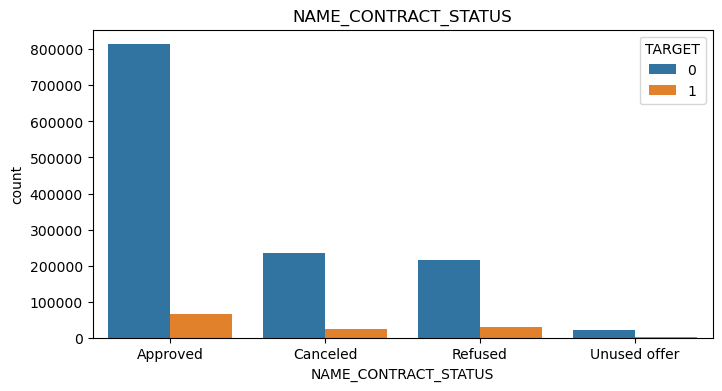

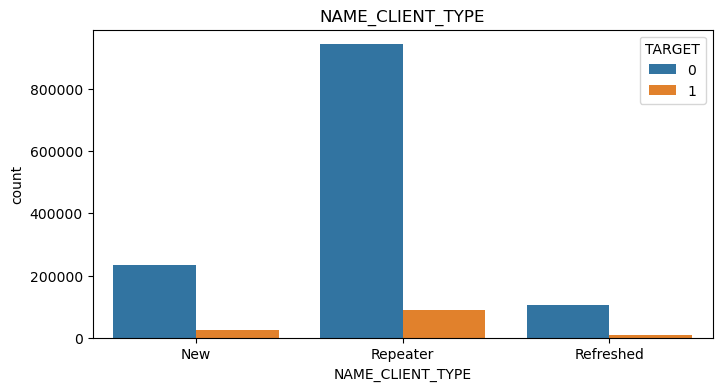

In [88]:
for col in ['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE']:
    plt.figure(figsize=(8,4))
    plt.title(col)
    sns.countplot(data = merged_data, x=col,  hue=merged_data.TARGET)
    plt.show()

# insights

1) We can clearly see that the approval rate is higher than the rest
2) The graph shows that most of the clients are repeaters followed by new 

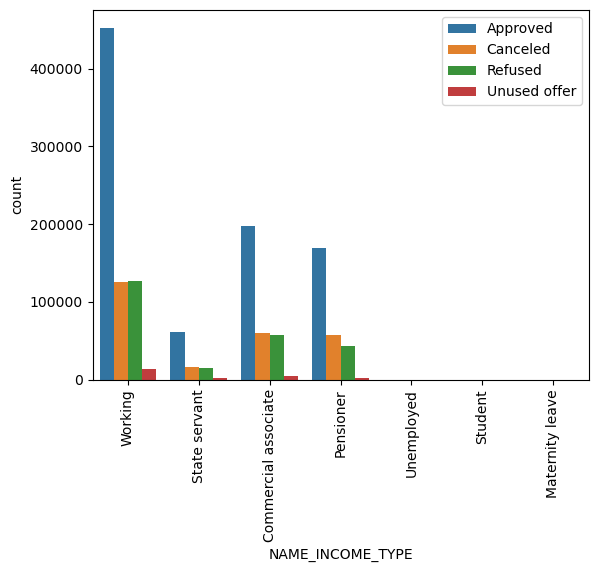

In [89]:
sns.countplot(data=merged_data, x='NAME_INCOME_TYPE', hue='NAME_CONTRACT_STATUS' )
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

We can see that refusal rate is higher in working class

# BIVARIATE ANALYSIS

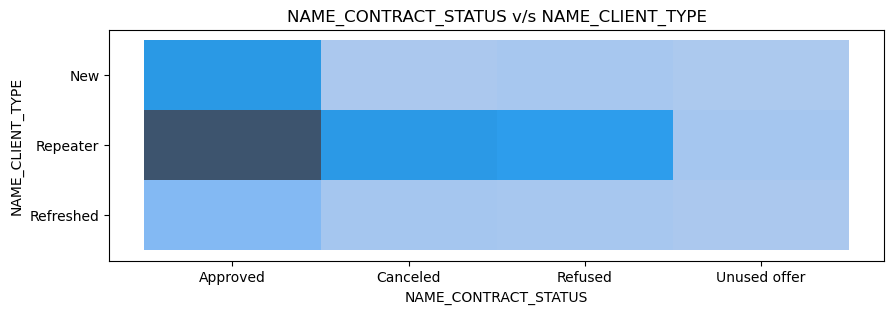

In [90]:
plt.figure(figsize=(10,3))

plt.title("NAME_CONTRACT_STATUS v/s NAME_CLIENT_TYPE")
sns.histplot(
    data=merged_data,
    x=merged_data.NAME_CONTRACT_STATUS,
    y=merged_data.NAME_CLIENT_TYPE, kde = True)

plt.show()

The approval rate is higher in Repeaters 

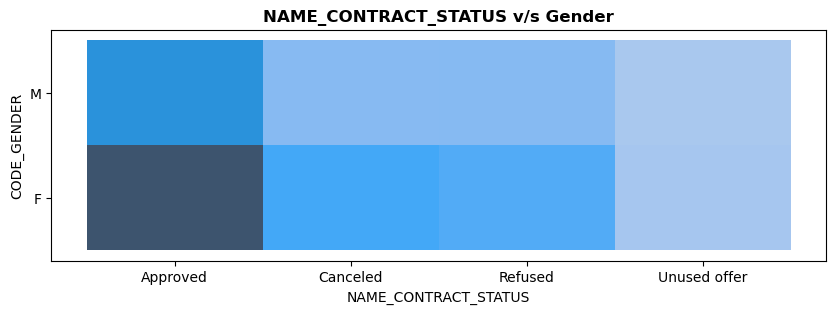

In [91]:
plt.figure(figsize=(10,3))

plt.title("NAME_CONTRACT_STATUS v/s Gender", fontweight="bold")
sns.histplot(
    data=merged_data,
    x=merged_data.NAME_CONTRACT_STATUS,
    y=merged_data.CODE_GENDER, kde = True)

plt.show()

Females have the highest approval rate

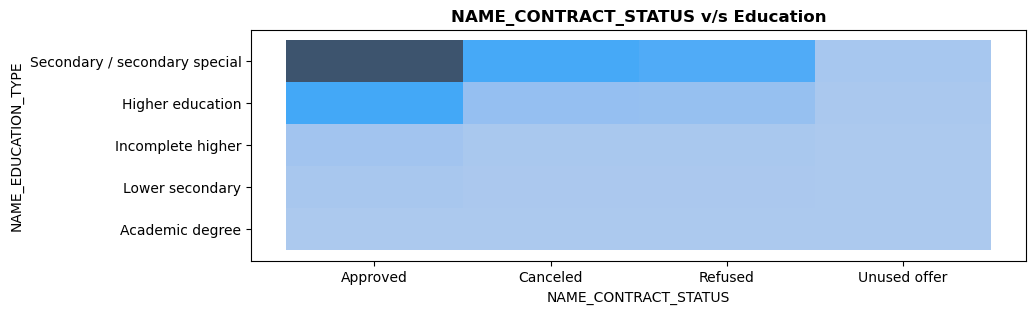

In [92]:
plt.figure(figsize=(10,3))

plt.title("NAME_CONTRACT_STATUS v/s Education", fontweight="bold")
sns.histplot(
    data=merged_data,
    x=merged_data.NAME_CONTRACT_STATUS,
    y=merged_data.NAME_EDUCATION_TYPE, kde = True)

plt.show()

Secondary/secondary special have higher approval rate

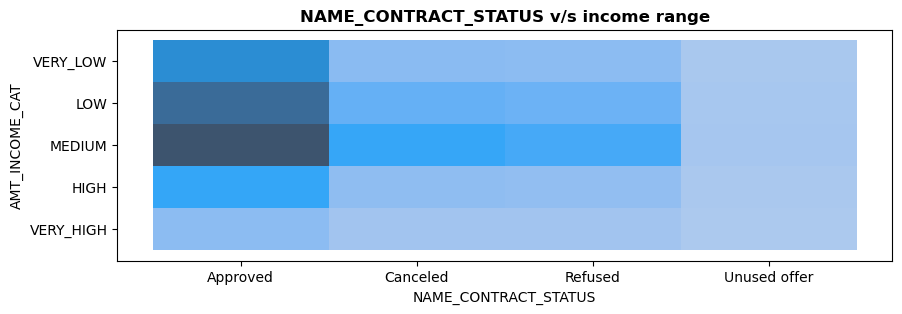

In [93]:
plt.figure(figsize=(10,3))

plt.title("NAME_CONTRACT_STATUS v/s income range", fontweight="bold")
sns.histplot(
    data=merged_data,
    x=merged_data.NAME_CONTRACT_STATUS,
    y=merged_data.AMT_INCOME_CAT, kde = True)

plt.show()

Medium income have higher approval rate followed by low, very low,highand very high

# Multivariate analysis

In [96]:
#finding the correlation on the merged data

merged_data_corr = merged_data[["AMT_GOODS_PRICE","CNT_CHILDREN","AMT_ANNUITY","EMPLOYMENT_YEARS","AMT_INCOME_TOTAL",
                                "AMT_CREDIT","CNT_FAM_MEMBERS","AGE_YEARS", "NAME_CLIENT_TYPE","REGION_RATING_CLIENT",
                                "REGION_RATING_CLIENT_W_CITY"]].corr()
merged_data_corr

 

,AMT_GOODS_PRICE,CNT_CHILDREN,AMT_ANNUITY,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,AGE_YEARS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
AMT_GOODS_PRICE,1.000000,-0.001238,0.762036,-0.055965,0.167247,0.986342,0.061183,0.046419,-0.087794,-0.095833
CNT_CHILDREN,-0.001238,1.000000,0.029488,-0.249823,0.011602,0.002749,0.879248,-0.363055,0.025721,0.024566
AMT_ANNUITY,0.762036,0.029488,1.000000,-0.108402,0.205835,0.758000,0.084385,-0.029385,-0.112701,-0.126482
EMPLOYMENT_YEARS,-0.055965,-0.249823,-0.108402,1.000000,-0.066995,-0.058621,-0.250235,0.632202,0.026564,0.028958
AMT_INCOME_TOTAL,0.167247,0.011602,0.205835,-0.066995,1.000000,0.165760,0.014010,-0.025695,-0.091756,-0.099050
AMT_CREDIT,0.986342,0.002749,0.758000,-0.058621,0.165760,1.000000,0.063138,0.047949,-0.086545,-0.095553
CNT_FAM_MEMBERS,0.061183,0.879248,0.084385,-0.250235,0.014010,0.063138,1.000000,-0.326169,0.029900,0.030855
AGE_YEARS,0.046419,-0.363055,-0.029385,0.632202,-0.025695,0.047949,-0.326169,1.000000,-0.020983,-0.019439
REGION_RATING_CLIENT,-0.087794,0.025721,-0.112701,0.026564,-0.091756,-0.086545,0.029900,-0.020983,1.000000,0.945437
REGION_RATING_CLIENT_W_CITY,-0.095833,0.024566,-0.126482,0.028958,-0.099050,-0.095553,0.030855,-0.019439,0.945437,1.000000


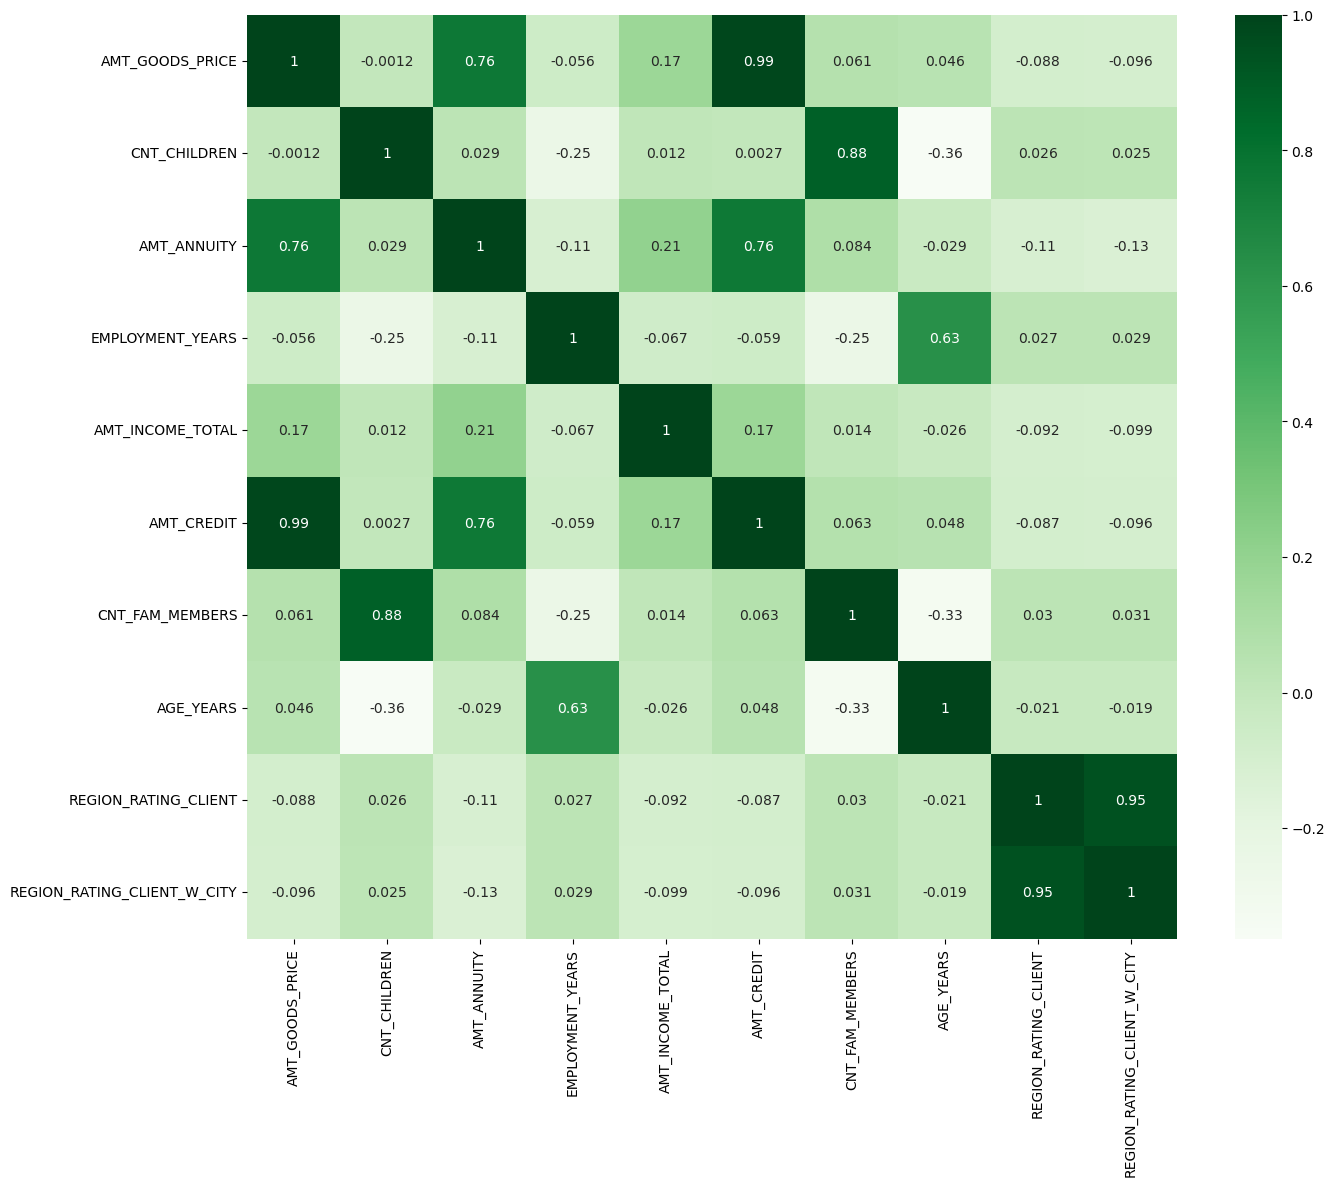

In [97]:
plt.figure(figsize=(15,12))
sns.heatmap(merged_data_corr, annot=True, cmap='Greens')

plt.show()

1) AMT_GOODS_PRICE and AMT_CREDIT have the highest correlation 
2) AMT CREDIT and AMT_ANNUITY also has high correlation 
